# House SalesPrice Prediction EDA
### This project is developed by Gaurang Kumbhar.¶
### Contact: gaurang.kumbhar1332003@gmail.com



In [7]:
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
import pandas as pd
df = pd.read_csv(r"E:\EDA PROJECT\DATASETS FOR EDA\DATA SET FOR HOUSE PRICE\train.csv")
df=df.drop(columns=['Id'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
df.shape

(1460, 80)

In [11]:
s=df.isna().sum()
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
df.duplicated().sum()

0

# Descriptive Analytics

## Determine categorical and continuous features 

In [13]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [14]:
cat[:5]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

In [15]:
con[:5]

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

In [16]:
df[cat].describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [17]:
df[con].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

# Data Visualisation

## Univariate Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

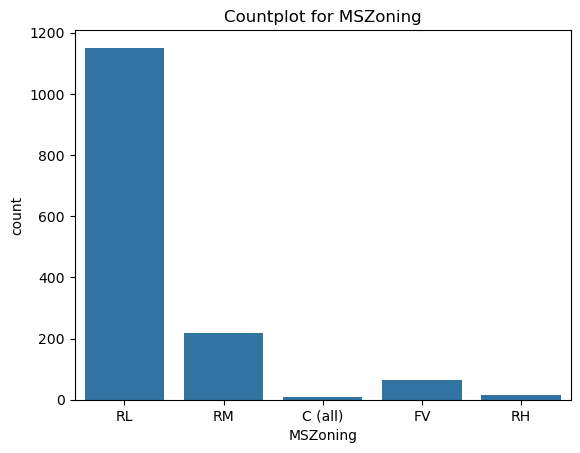

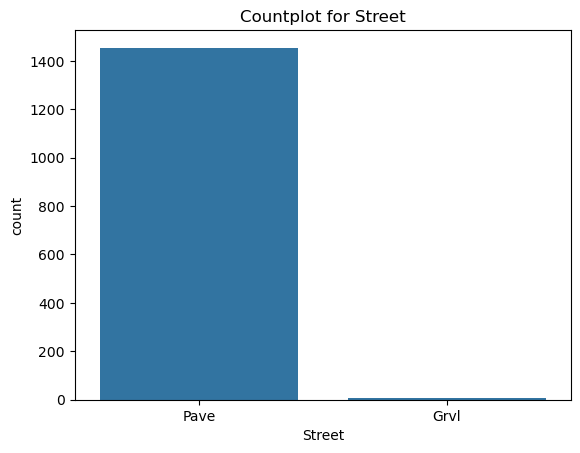

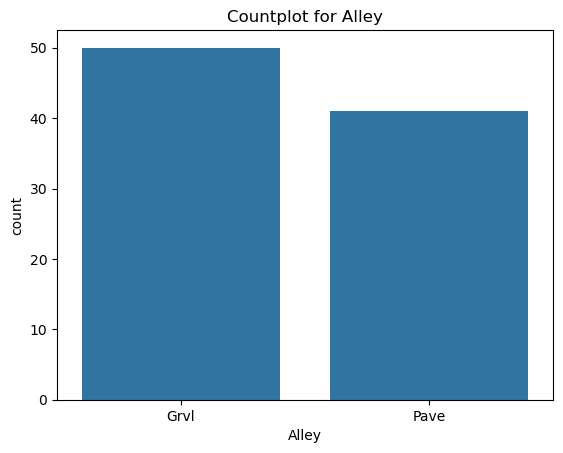

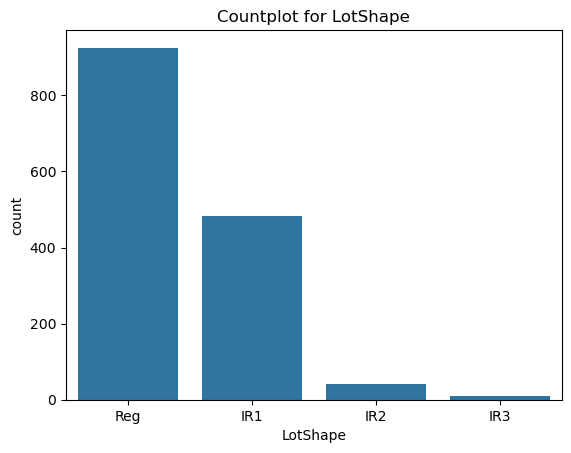

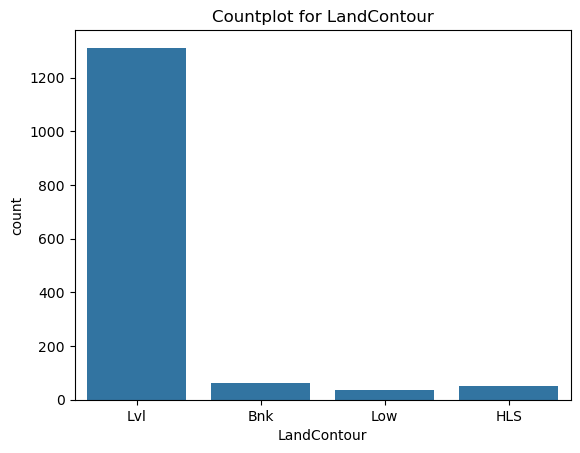

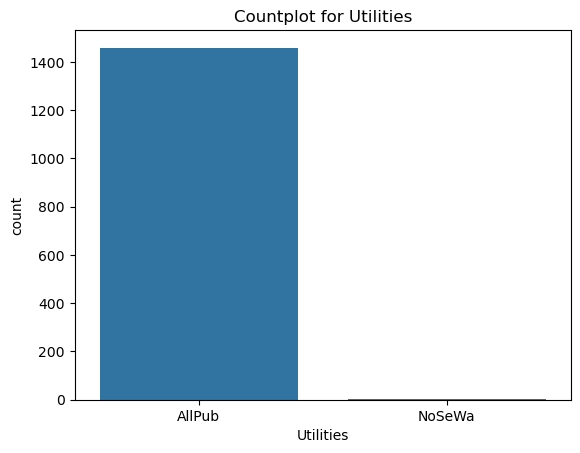

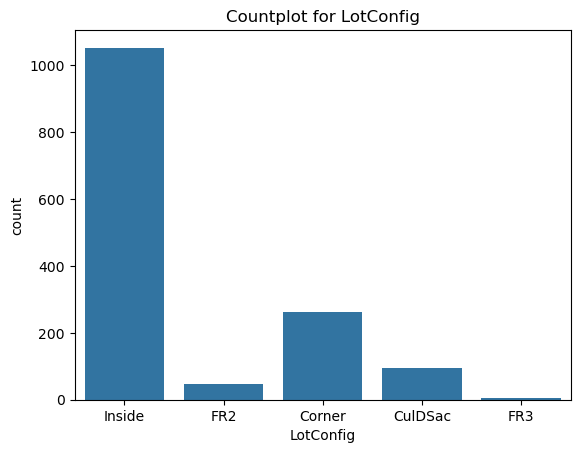

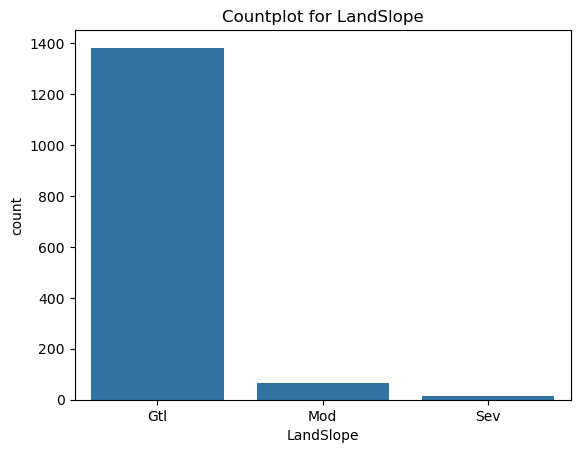

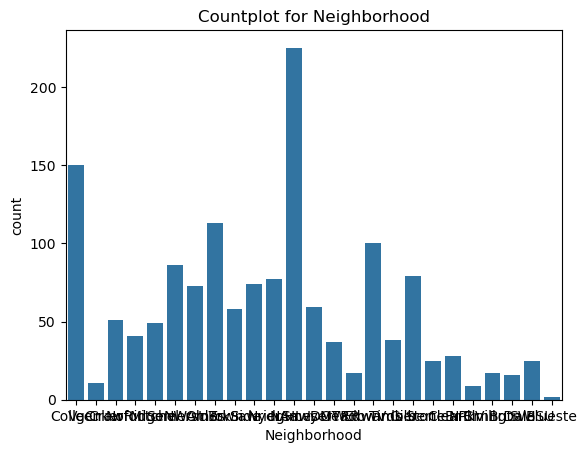

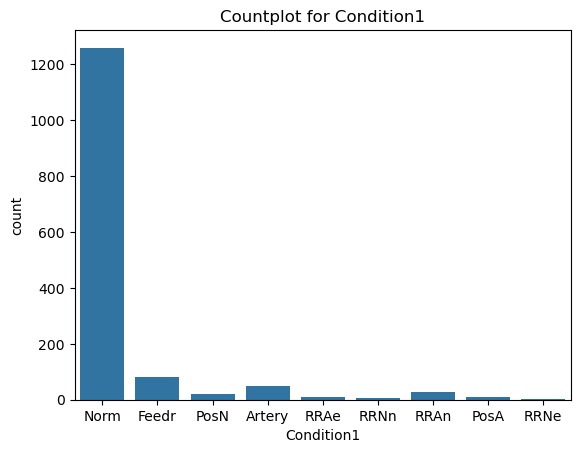

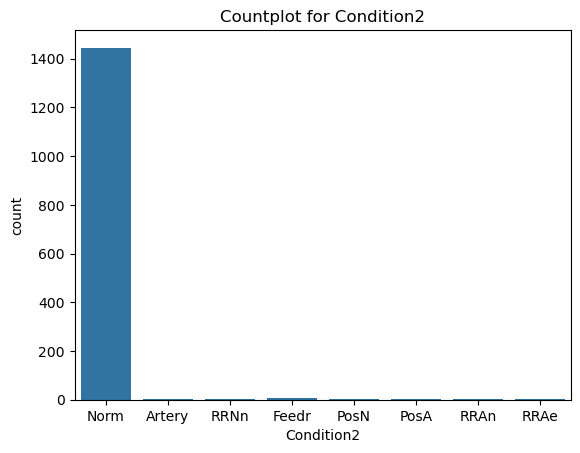

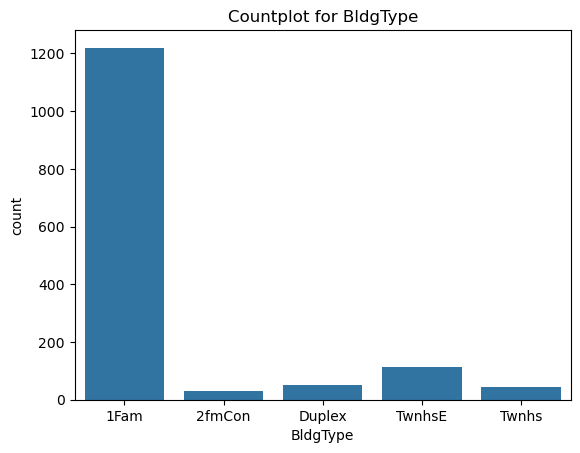

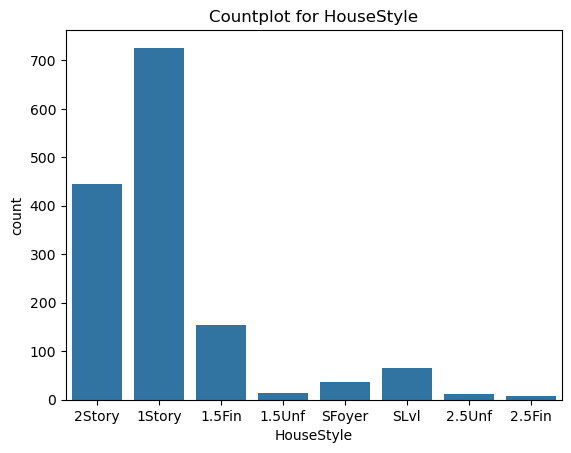

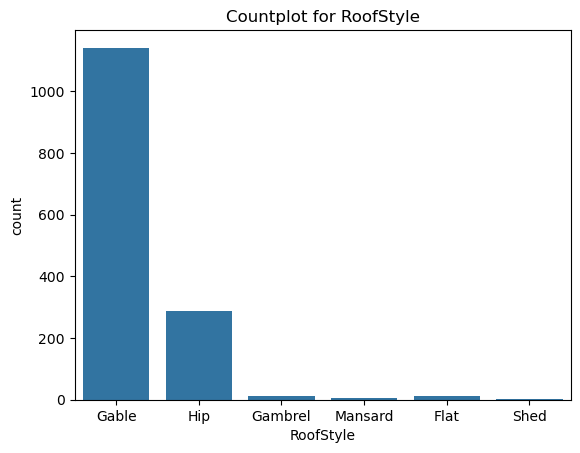

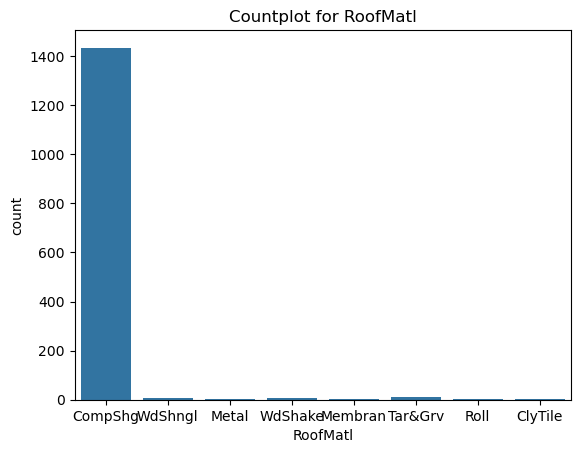

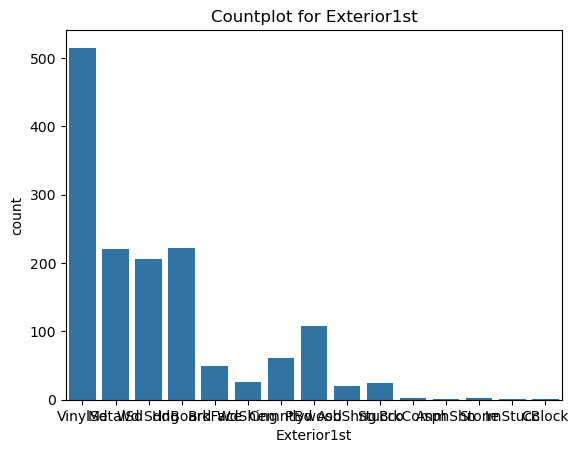

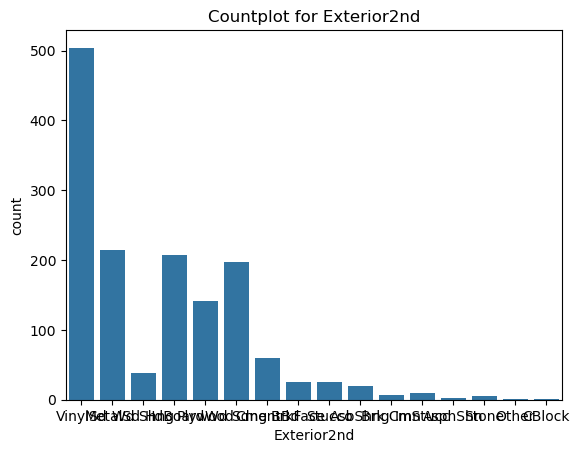

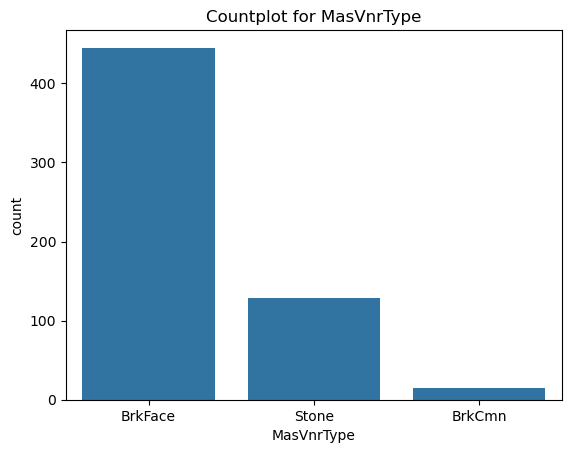

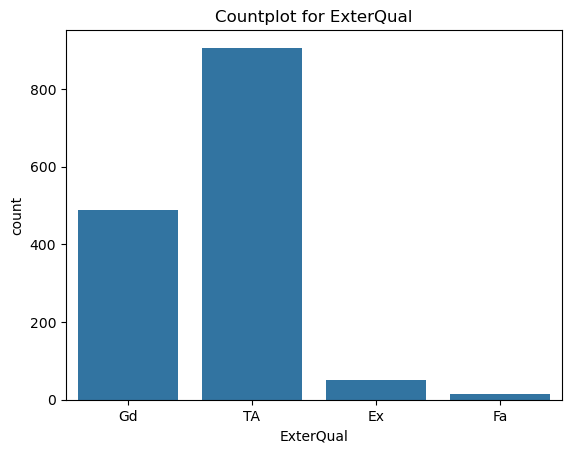

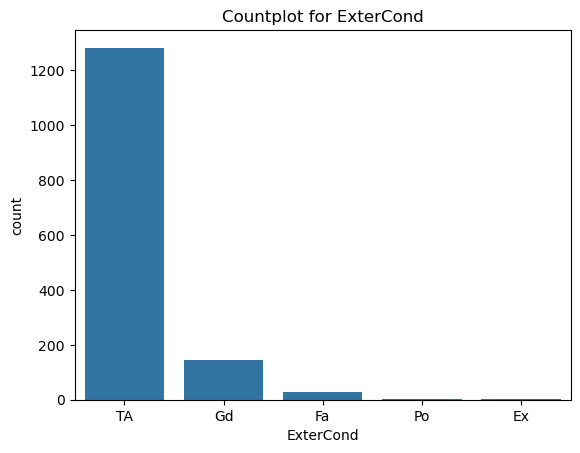

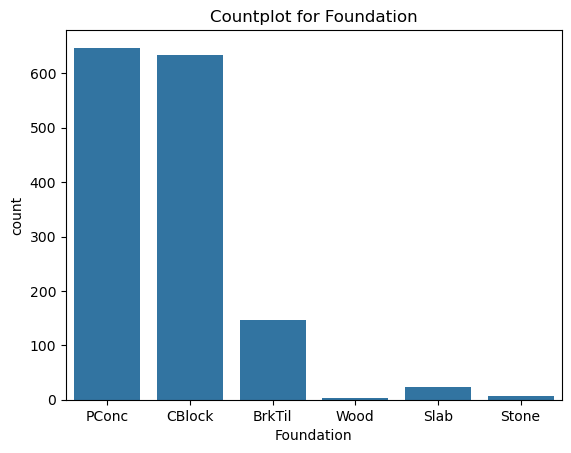

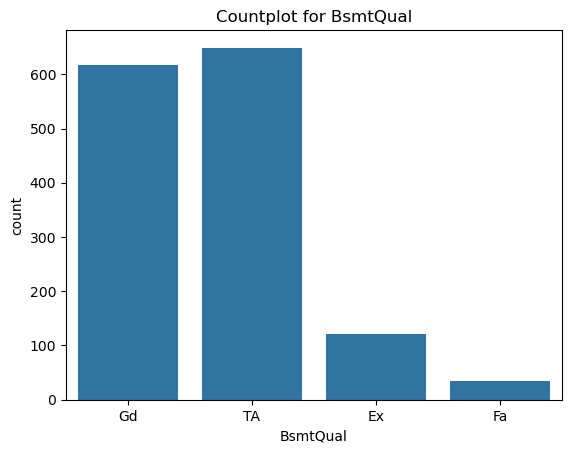

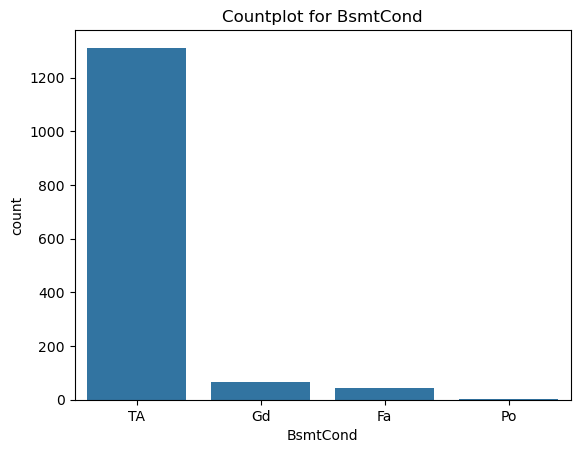

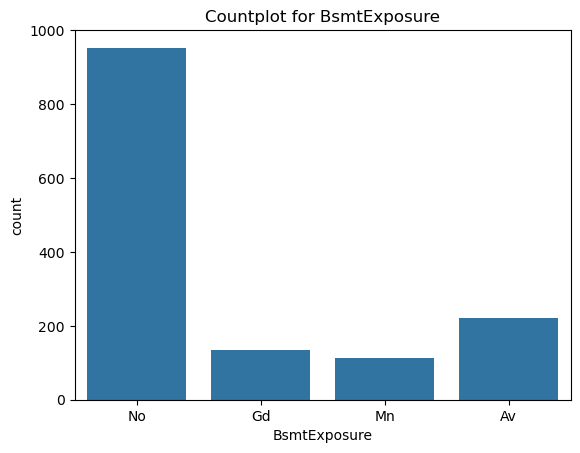

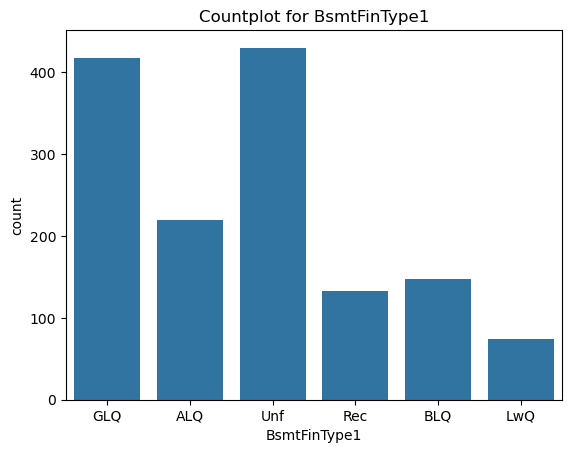

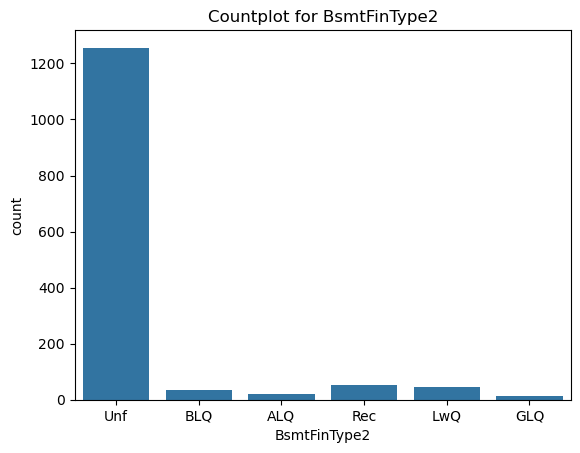

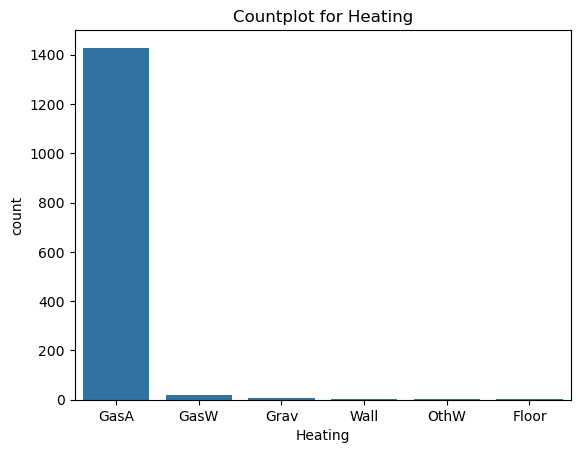

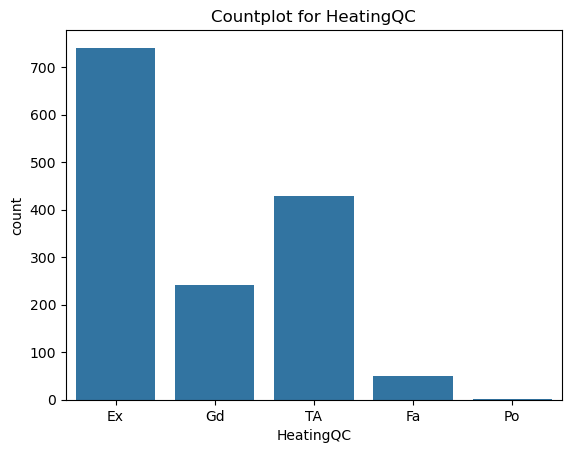

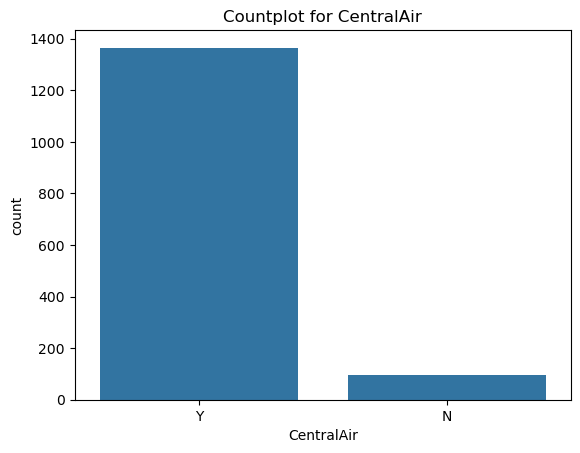

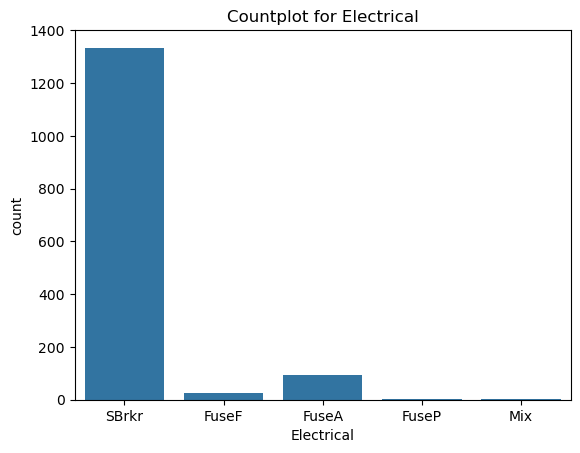

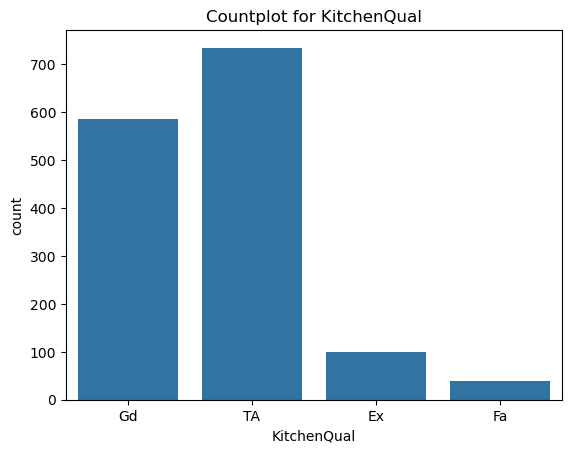

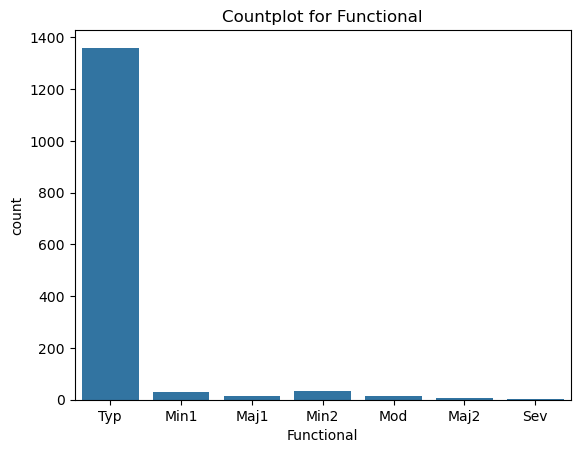

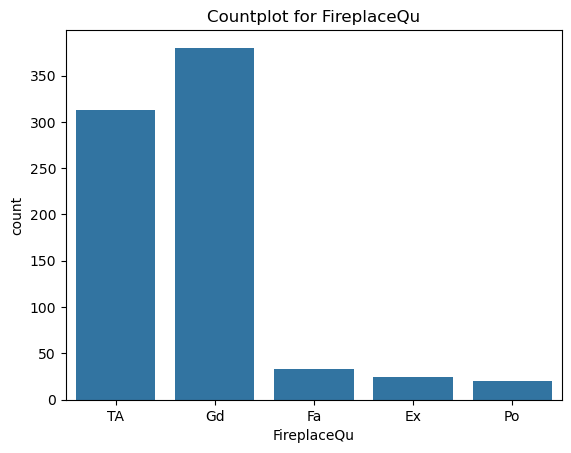

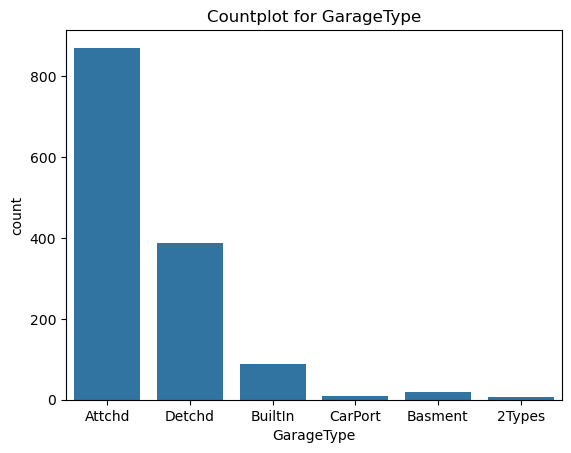

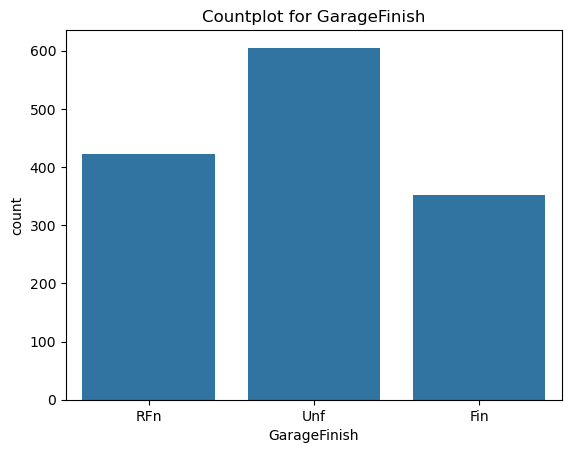

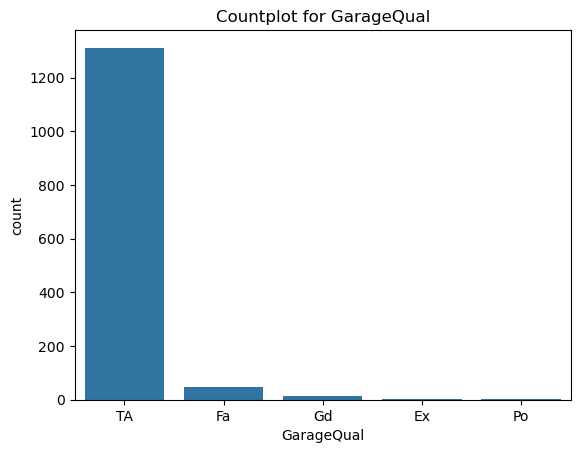

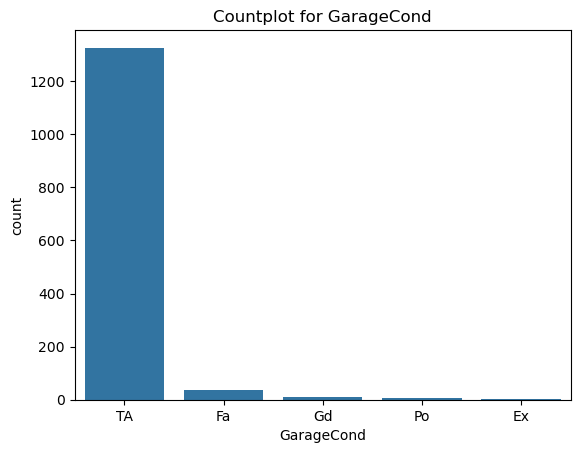

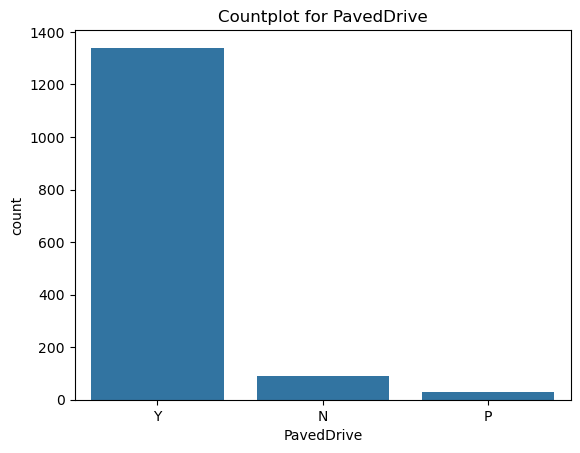

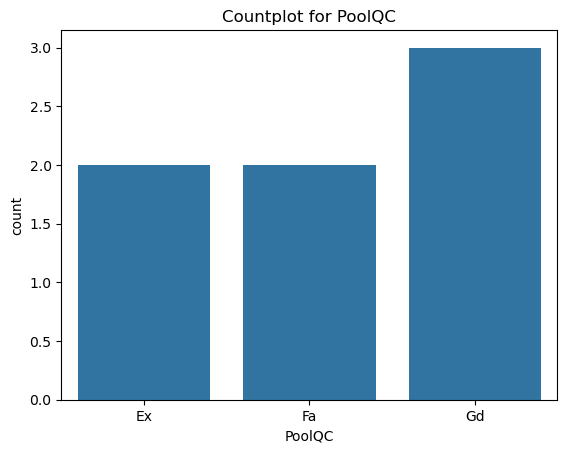

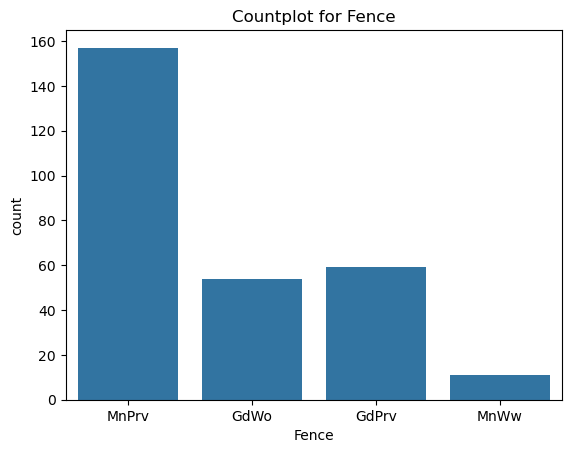

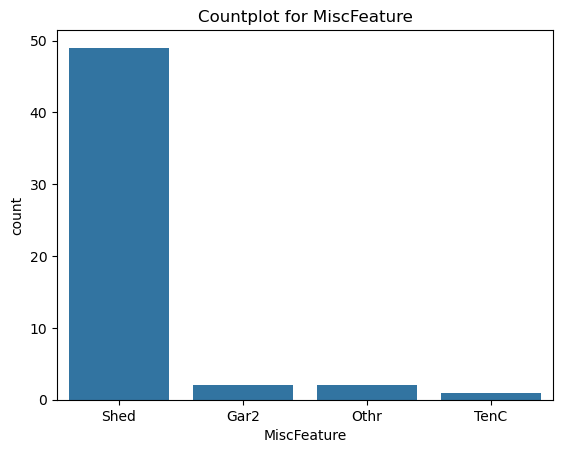

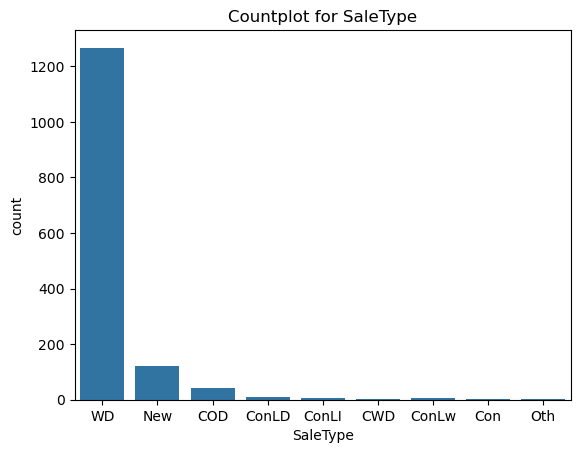

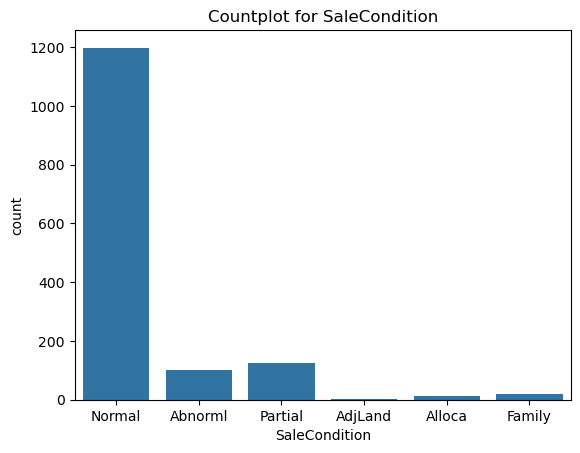

In [19]:
for i in cat:
    sns.countplot(df,x=i)
    plt.title(f'Countplot for {i}')
    plt.show()

## ===========================================================================================================

## ===========================================================================================================

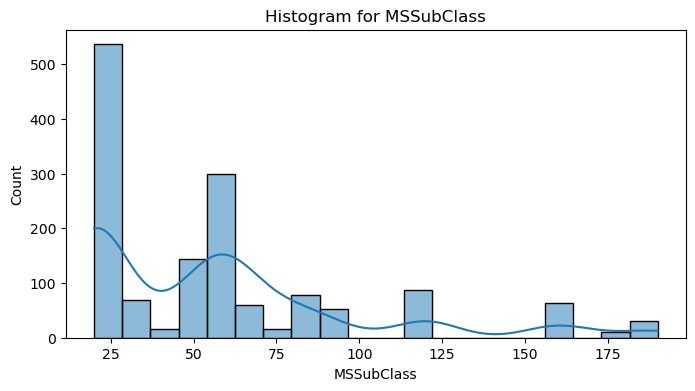

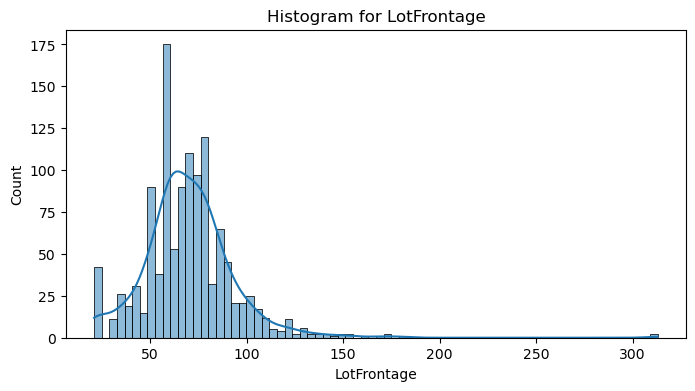

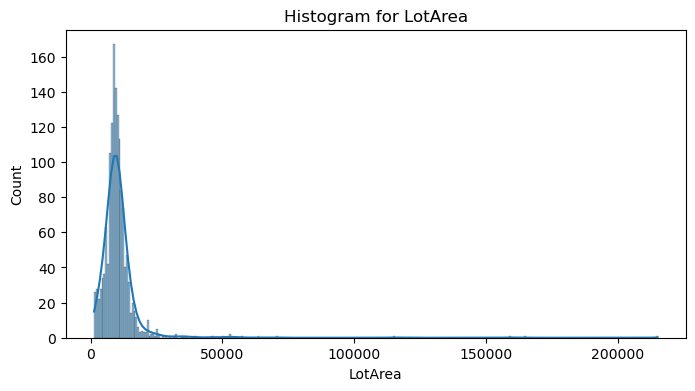

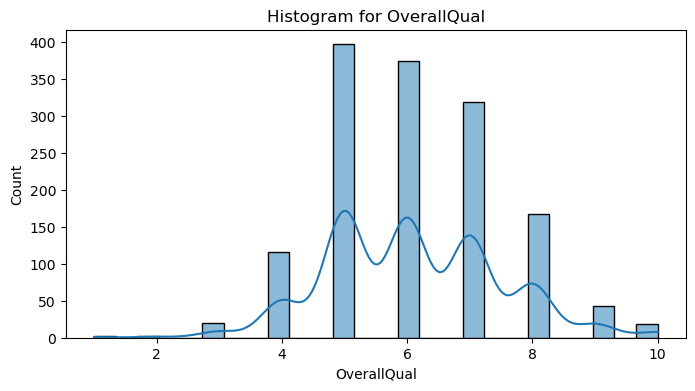

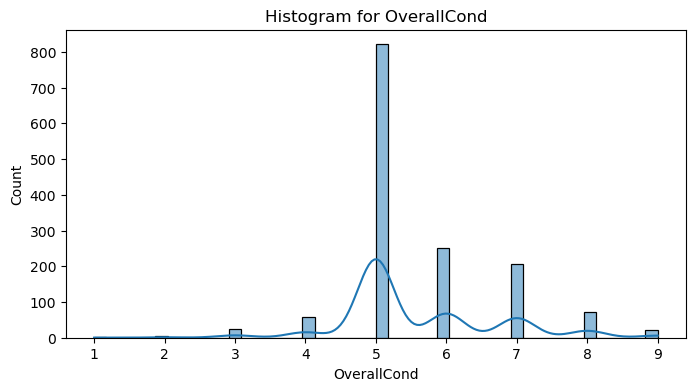

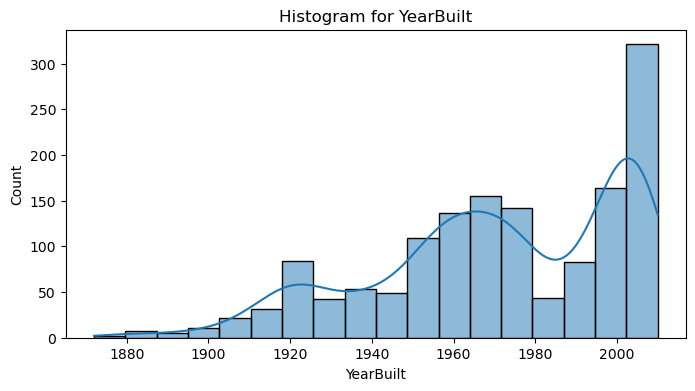

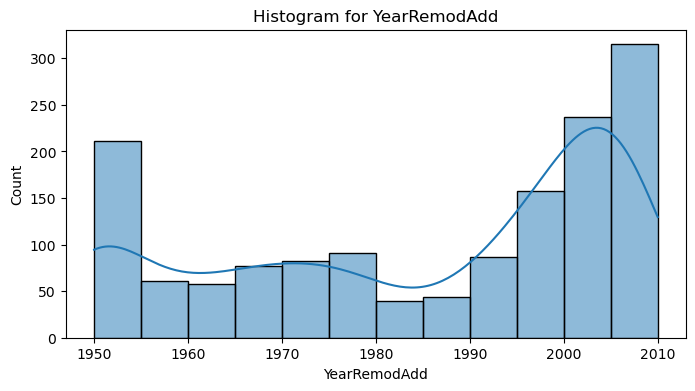

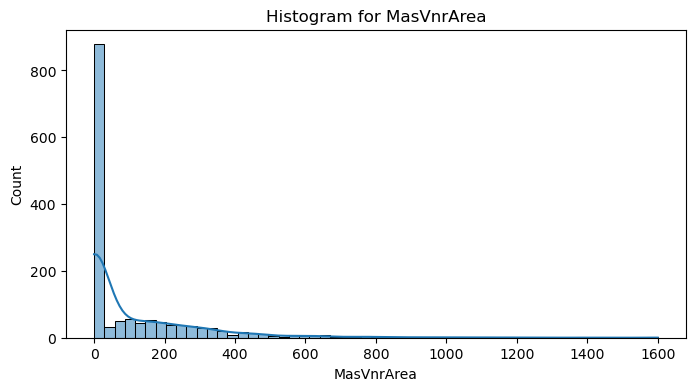

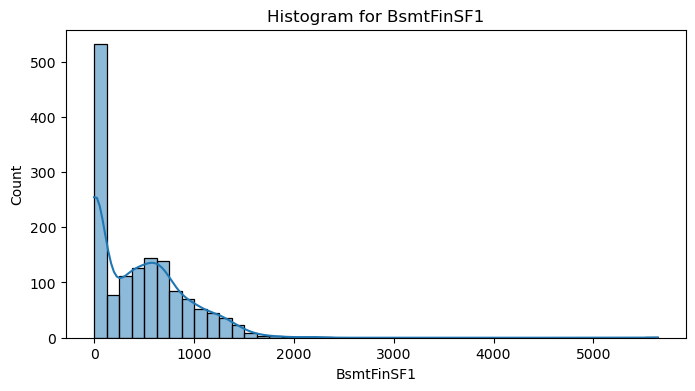

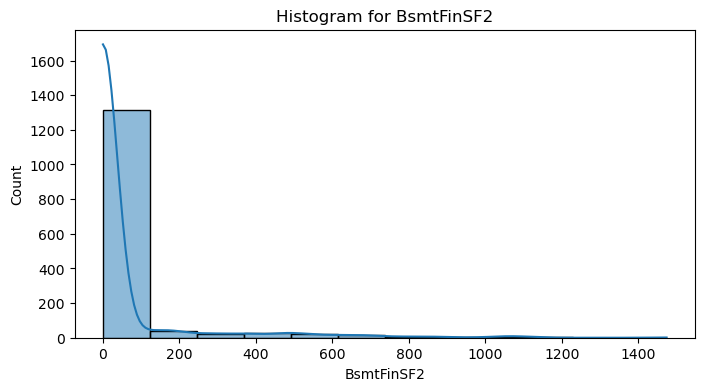

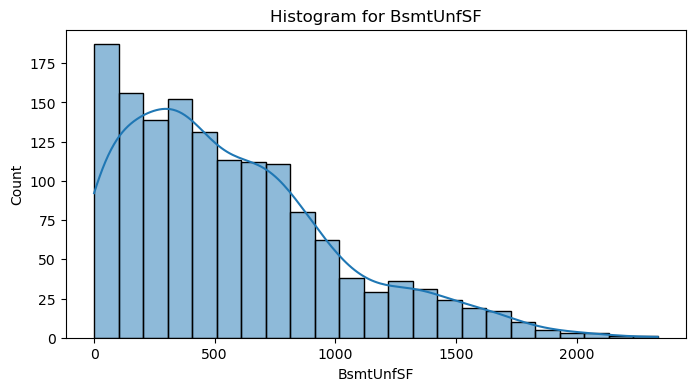

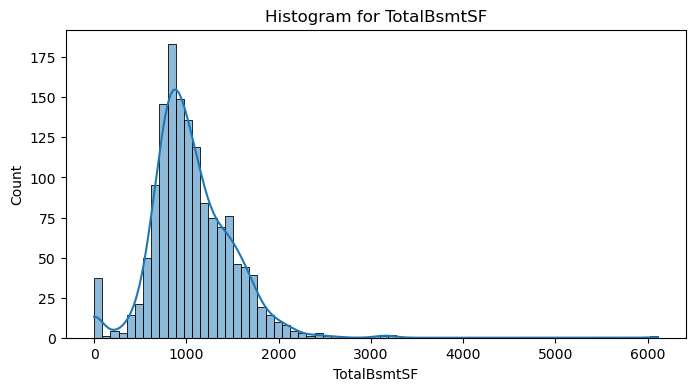

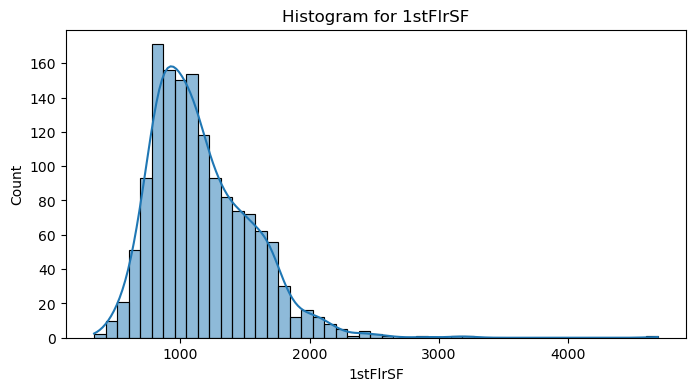

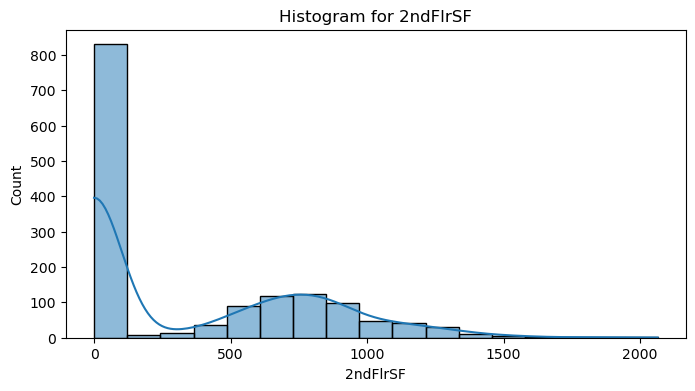

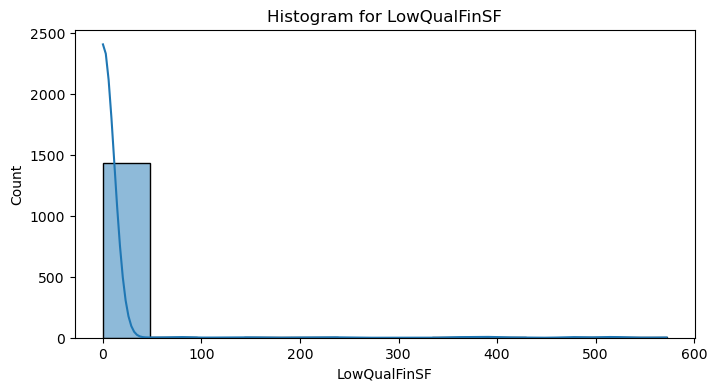

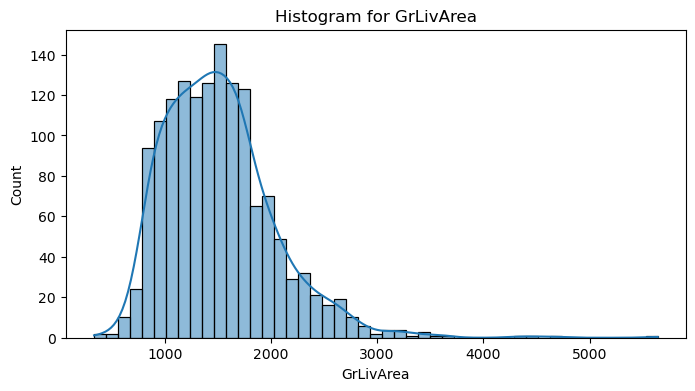

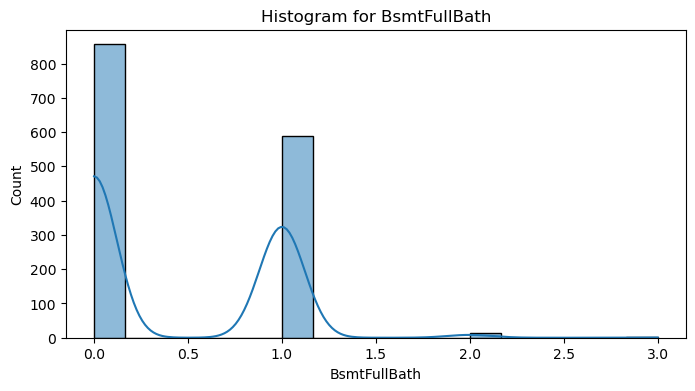

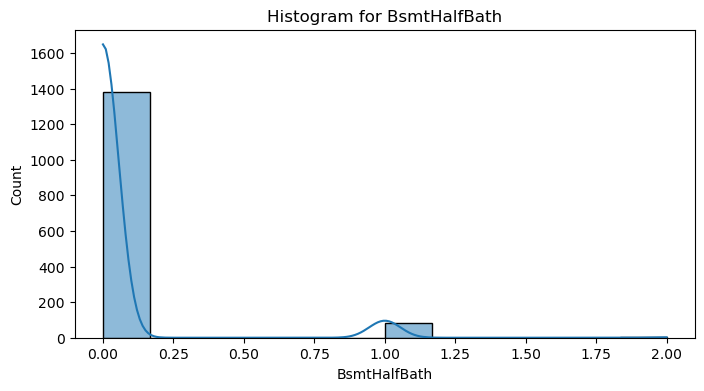

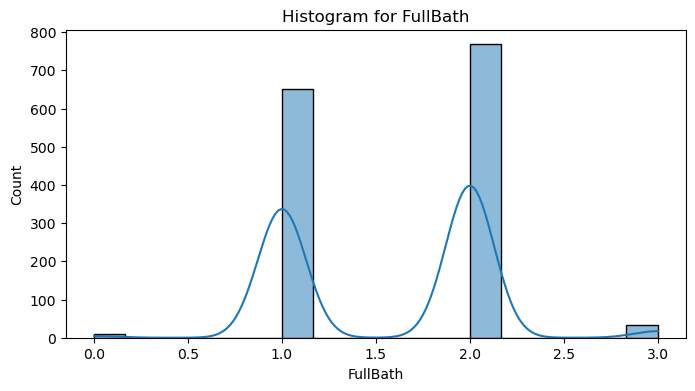

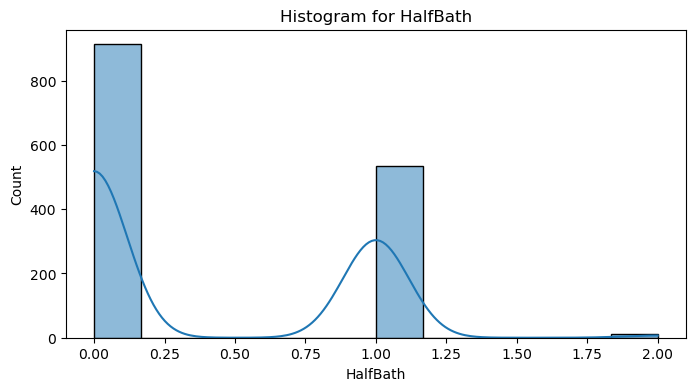

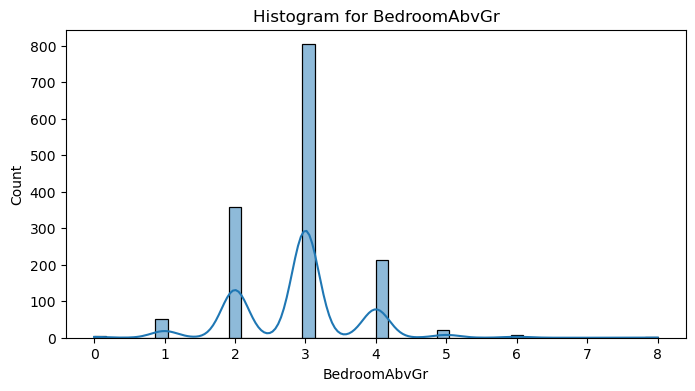

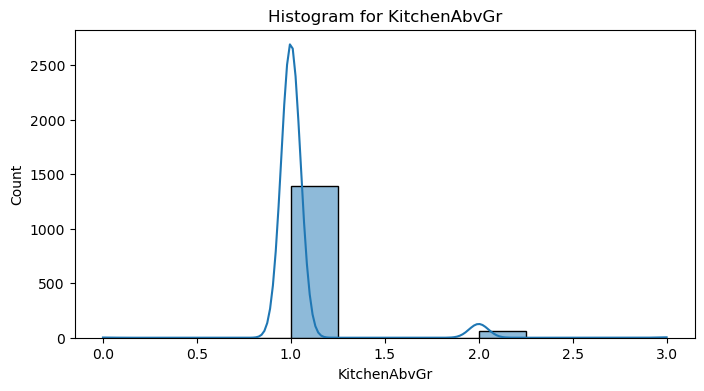

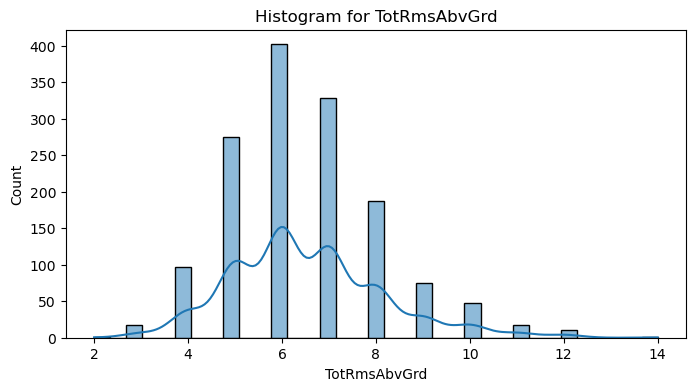

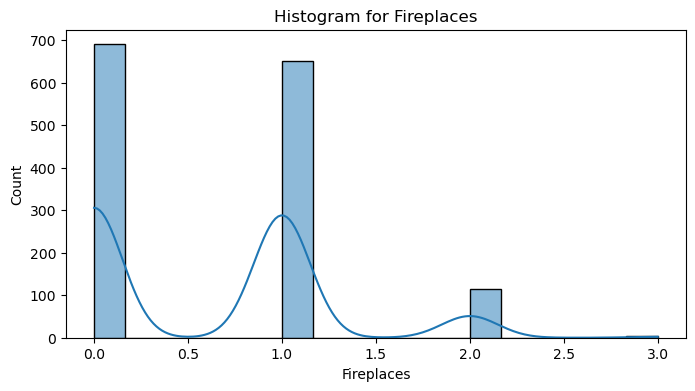

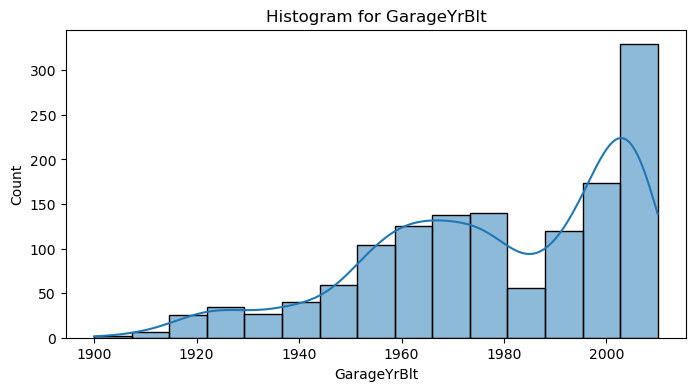

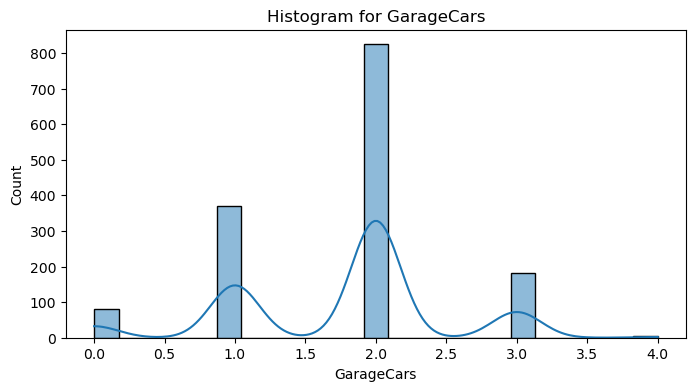

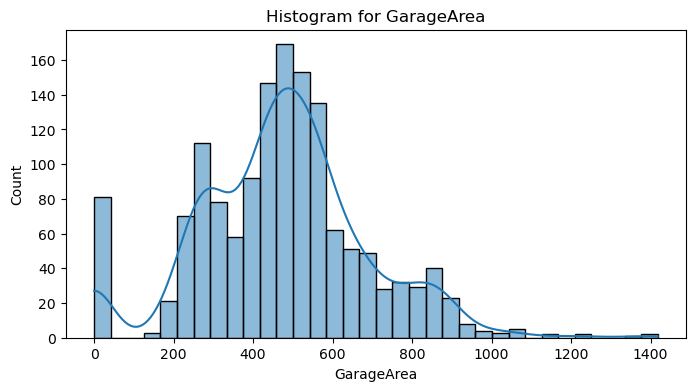

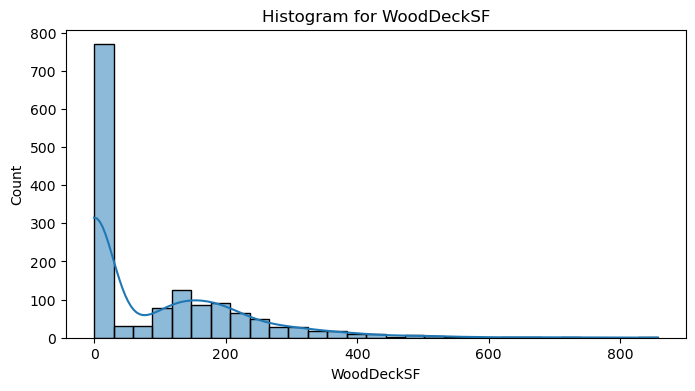

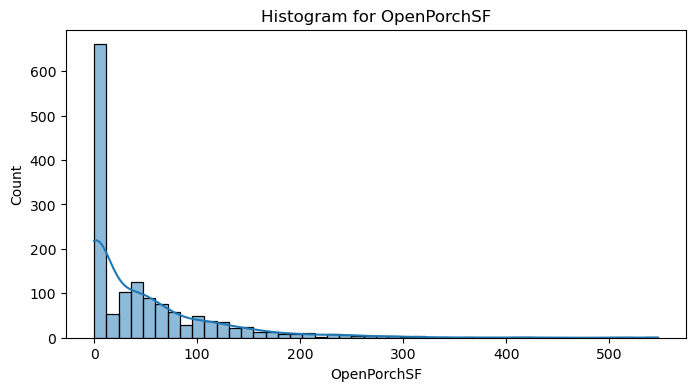

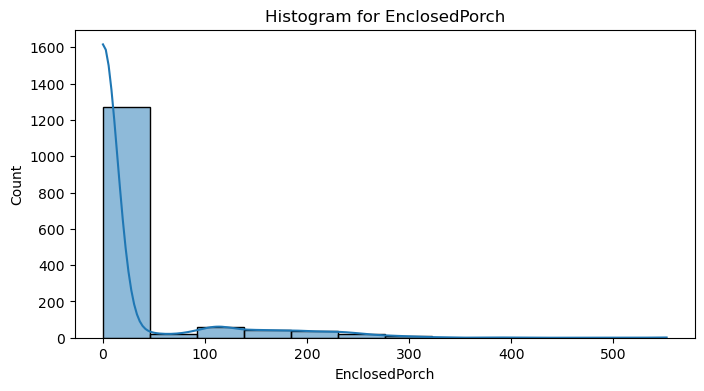

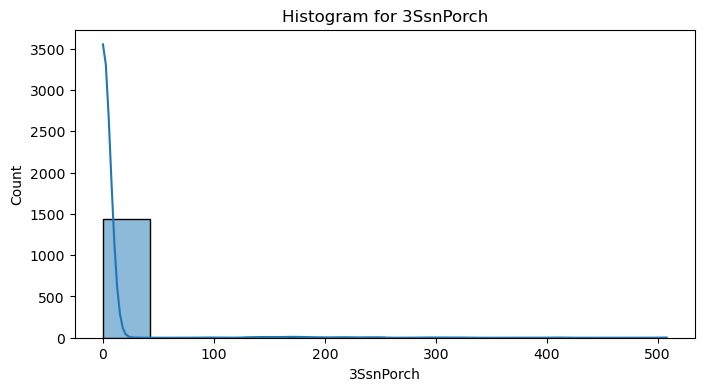

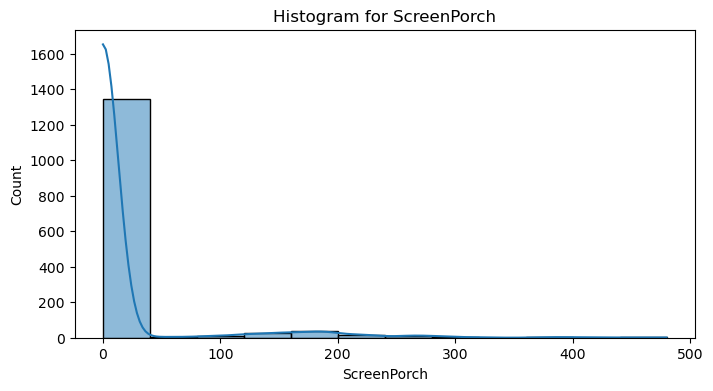

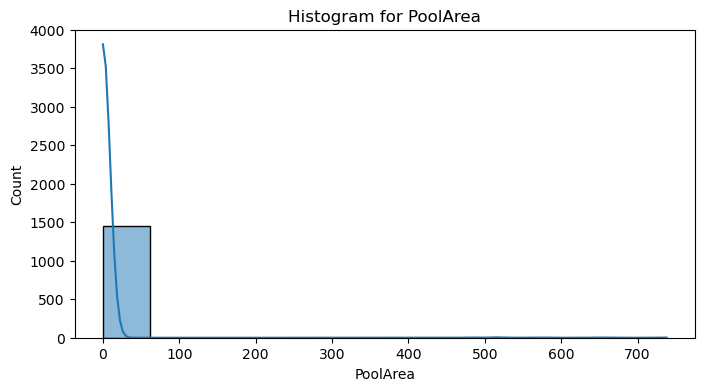

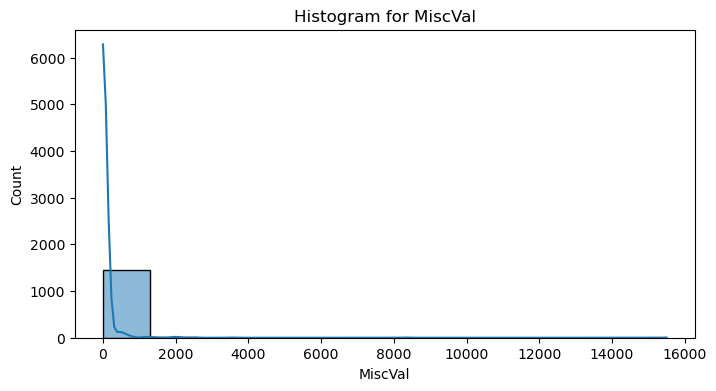

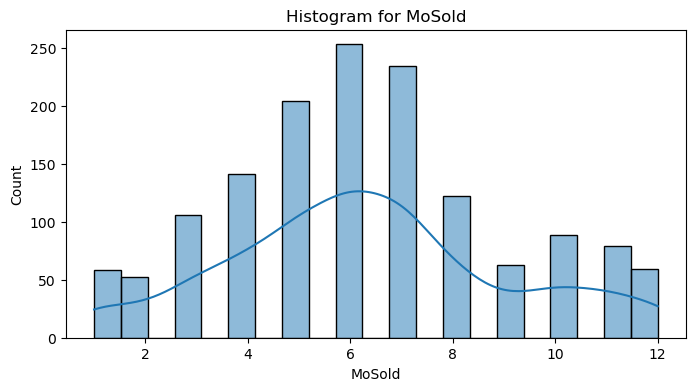

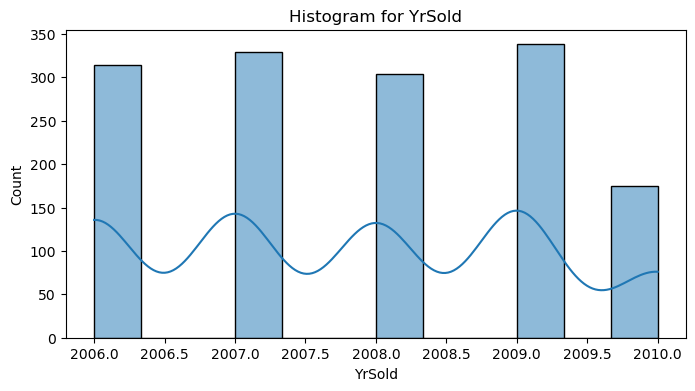

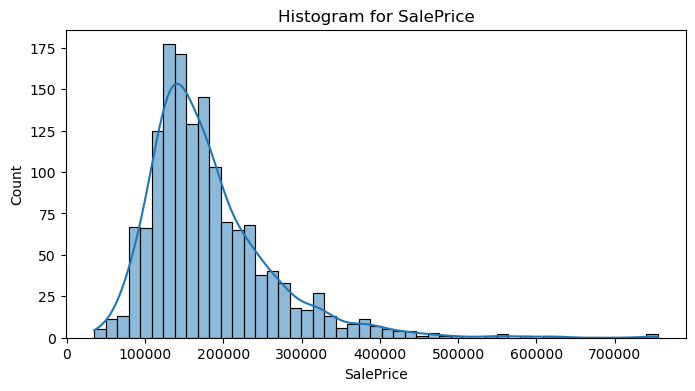

In [20]:
for i in con:
    plt.figure(figsize=(8,4))
    sns.histplot(df,x=i,kde=True)
    plt.title(f'Histogram for {i}')

## 📊 Countplot Observations

1. **Zoning Classification:** Most properties fall under `'RL'` (Residential Low Density).
2. **Street Access:** The majority of houses have **paved road access**.
3. **Alley Access:** Most properties have **no alley access**.
4. **Lot Shape:** Properties are typically of **regular or slightly irregular shapes**; very few are highly irregular.
5. **Land Slope:** Almost all properties are **level or gently sloped**.
6. **Utilities:** 99% of homes have access to **all public utilities** (Electricity, Gas, Water, Sewer).
7. **Proximity to Conditions:** 98% of homes have **normal proximity** to nearby conditions (like railroads or traffic).
8. **Building Type:** 95% of homes are **1-family dwellings**.
9. **House Style:** Most homes are **1-story**, followed by **2-story** and **1.5-story finished** types.
10. **Quality Ratings:**
    - **Exterior Quality**, **Basement Quality**, and **Kitchen Quality** are mostly **Typical/Average to Good**.
    - **Exterior Condition** and **Basement Condition** are also generally **Typical/Average**.
11. **Foundation Type:** Most homes are built on **PConc** or **CBlock** foundations.
12. **Heating System:** **Gas forced warm air furnace** is the most common heating method.
13. **Heating Quality:** Ranges from **Excellent** to **Typical/Average**.
14. **Air Conditioning:** The majority of homes have **central air conditioning**.
15. **Electrical System:** Most homes use **Standard Circuit Breakers & Romex** wiring.
16. **Home Functionality:** Typically rated as **‘Typical’**.
17. **Garage:** **Garage quality and condition** are mostly **Typical/Average**.
18. **Amenities:** Most homes do **not have pools, fences, or miscellaneous exterior features**.
19. **Sale Type:** Predominantly sold via **Warranty Deed - Conventional**.
20. **Sale Condition:** Most sales occur under **Normal Conditions**.

---

## 📈 Histogram Observations

1. **Street Frontage:** Most properties have **50–100 feet** of street frontage; a few extend to **100–300 feet**.
2. **Overall Quality & Condition:** 
   - Quality mostly ranges from **5 to 7** (out of 10).
   - Condition is centered around **5**.
3. **Year Built:** Most houses were built **around 2000**, with a secondary cluster from **1950–1980**.
4. **Year Remodeled:** Common remodel years are **1950** and **2000–2010**.
5. **Basement (Unfinished):** Typically ranges from **0–1,000 sq ft**.
6. **Total Basement Area:** Falls between **800–1,200 sq ft**.
7. **Above Ground Living Area:** Ranges from **1,000–2,000 sq ft**.
8. **Basement Bathrooms:** Most homes have **no bathrooms** in the basement; a few have **one full bathroom**.
9. **Above Ground Bathrooms:** Commonly include **1–2 full bathrooms**; a few have **1 half bathroom**.
10. **Rooms Above Grade:** Most houses have **5–7 rooms**.
11. **Sales Season:** Homes are most frequently sold between **April and July**.
12. **Sale Price:** 
    - Majority are sold between **$100,000 – $200,000**.
    - A small number are sold at **premium prices** ranging from **$400,000 – $700,000**.

---

📬 **Author:** Gaurang Kumbhar  
📧 **Email:** [gaurang.kumbhar1332003@gmail.com](mailto:gaurang.kumbhar1332003@gmail.com)


## Bivariate Analysis

In [21]:
con[:10]

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2']

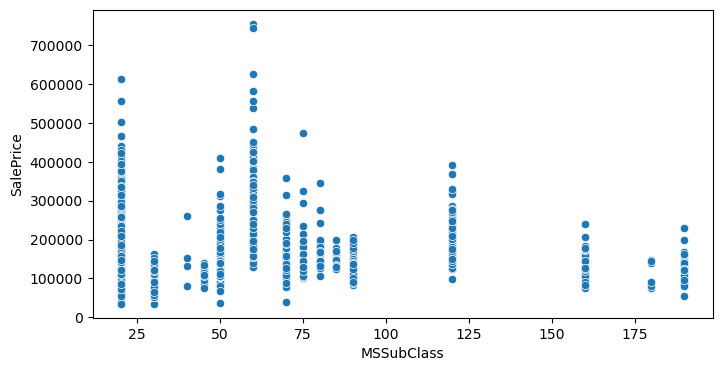

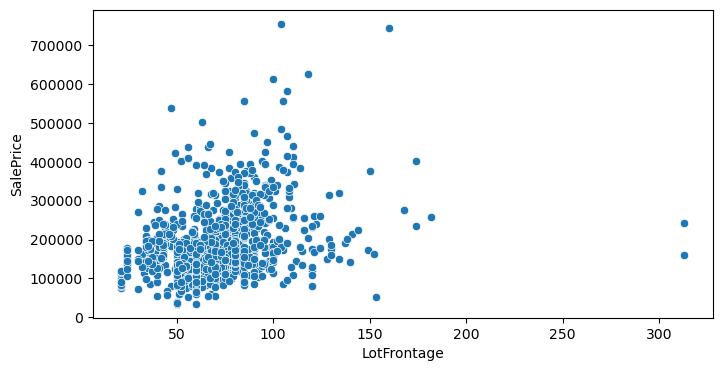

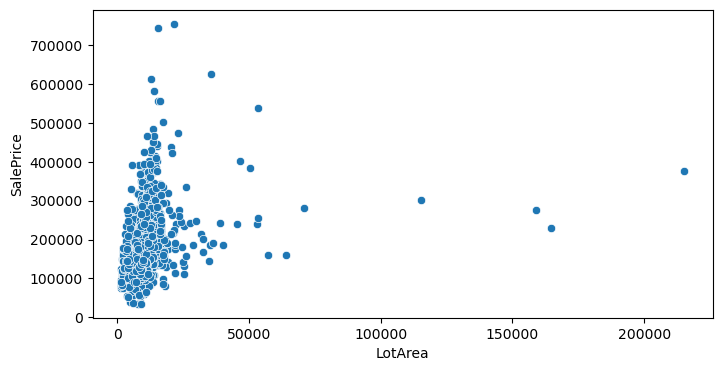

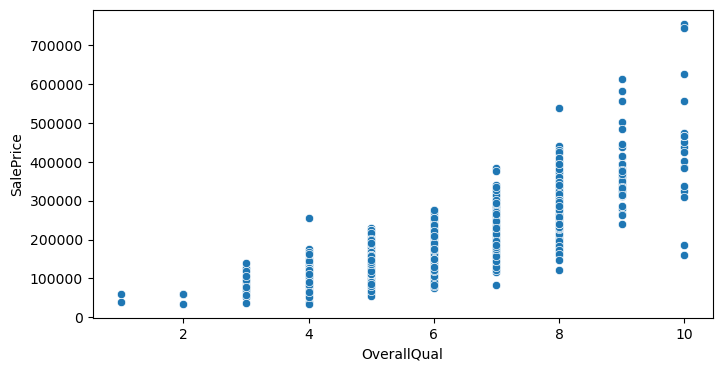

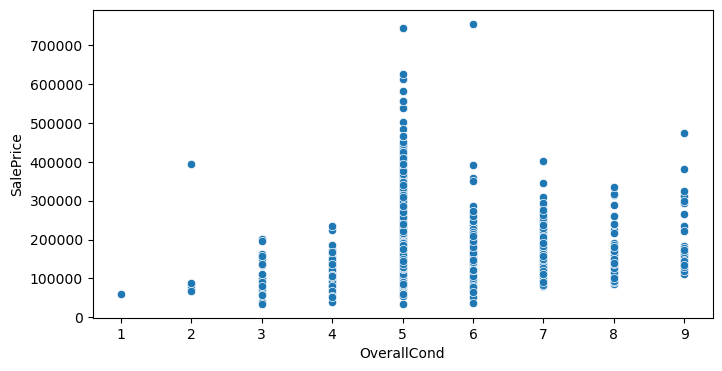

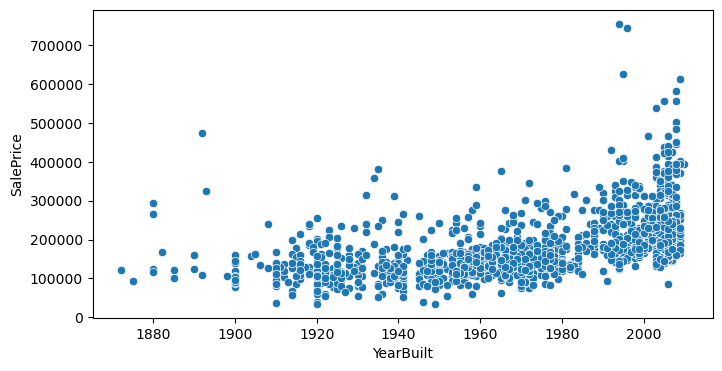

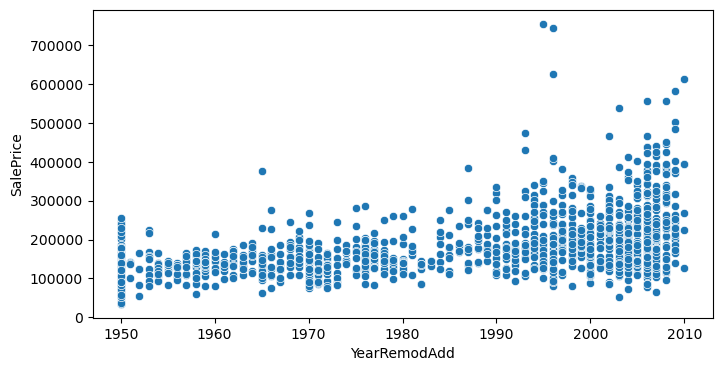

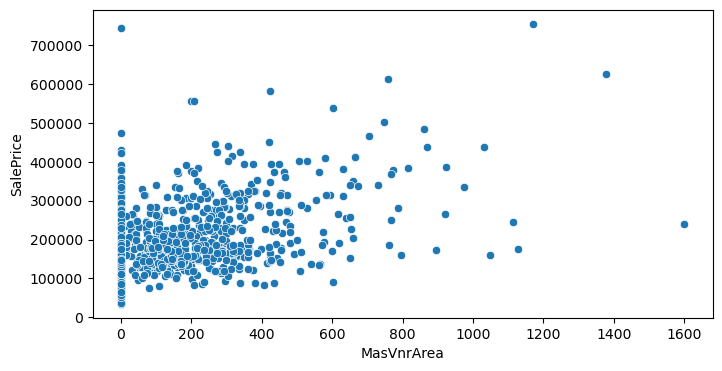

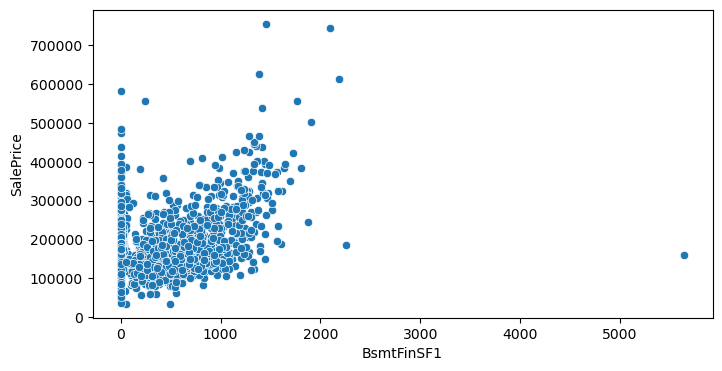

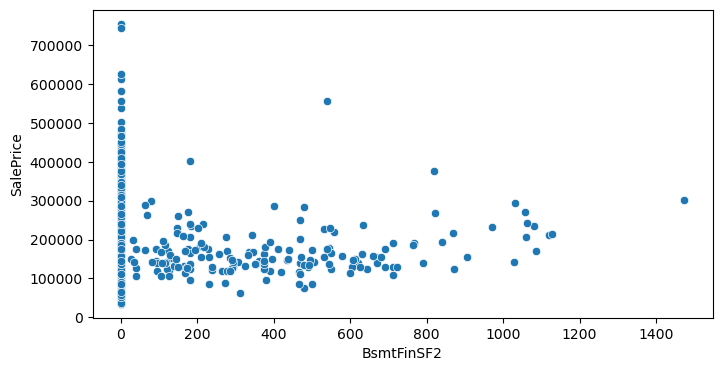

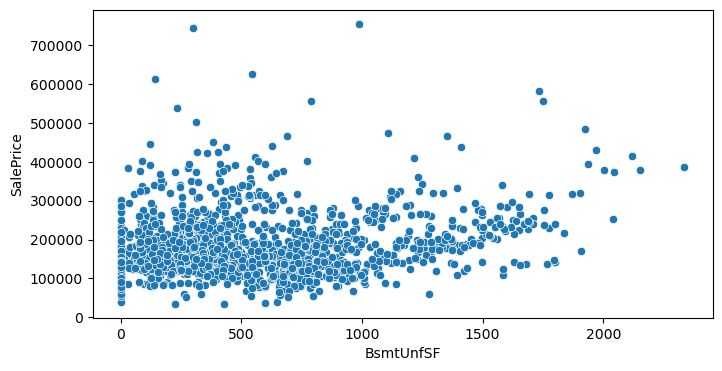

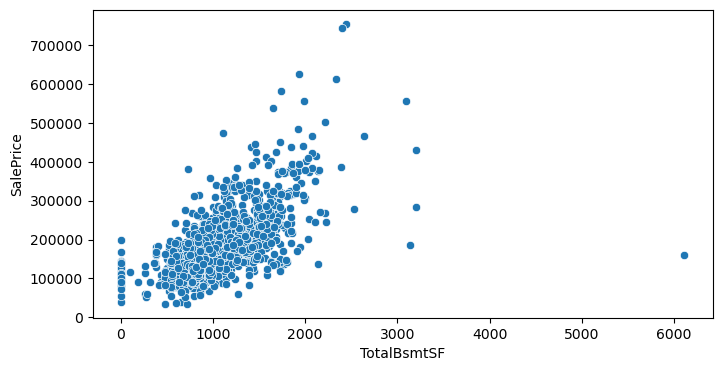

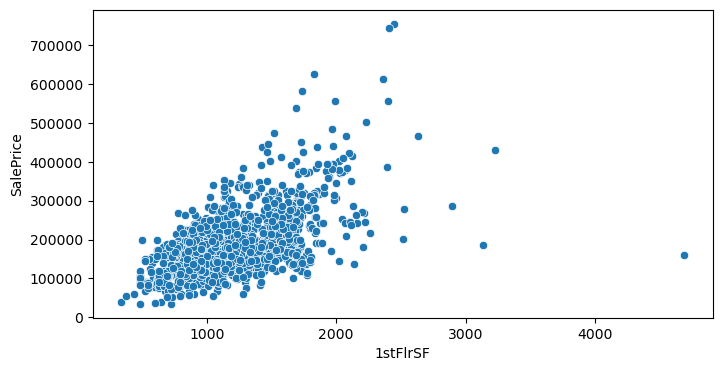

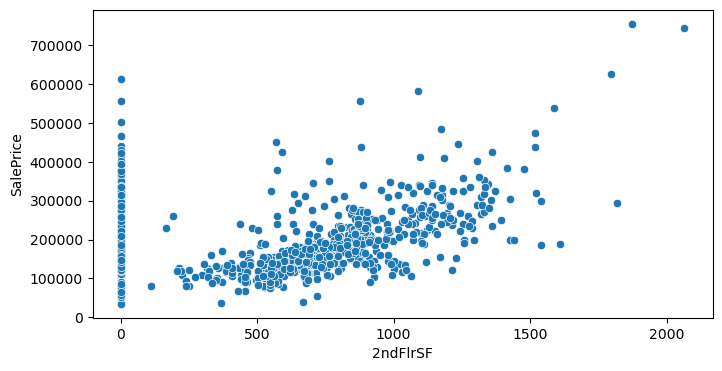

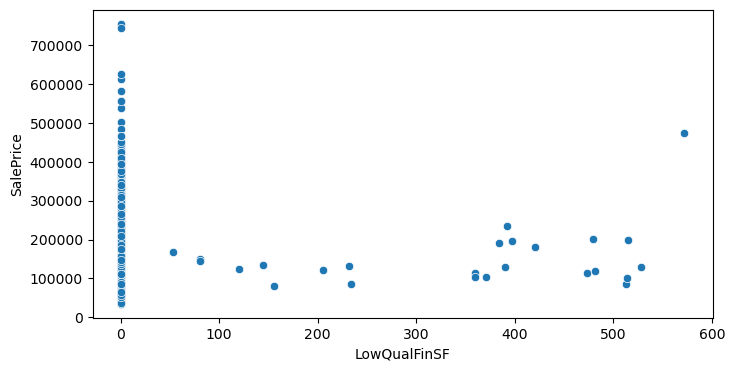

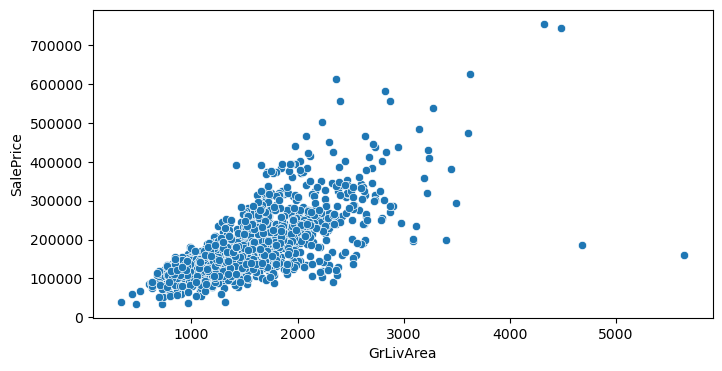

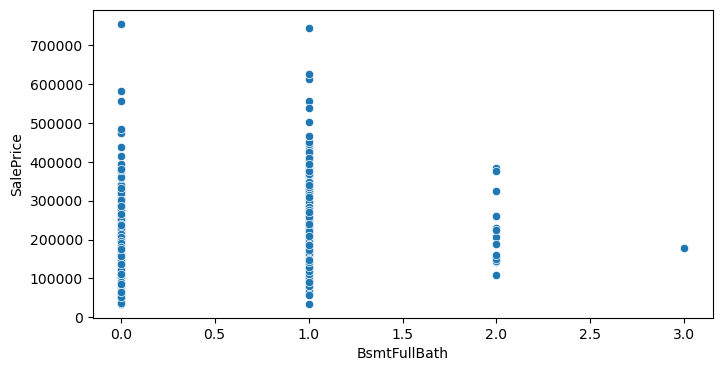

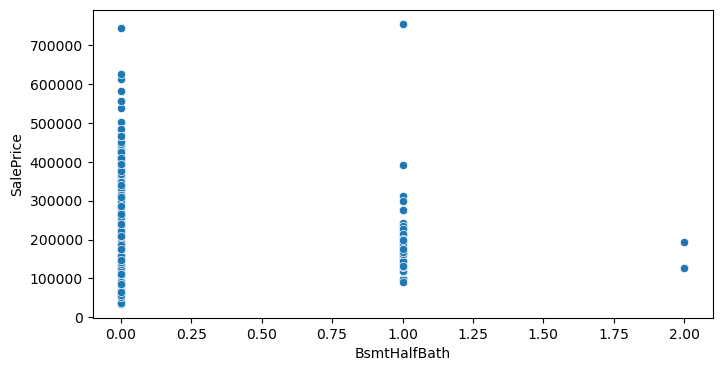

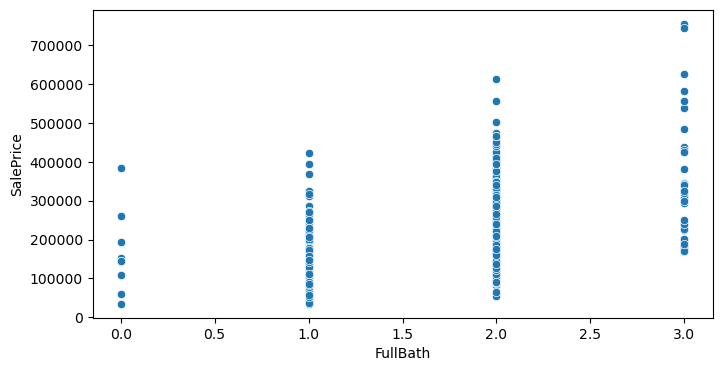

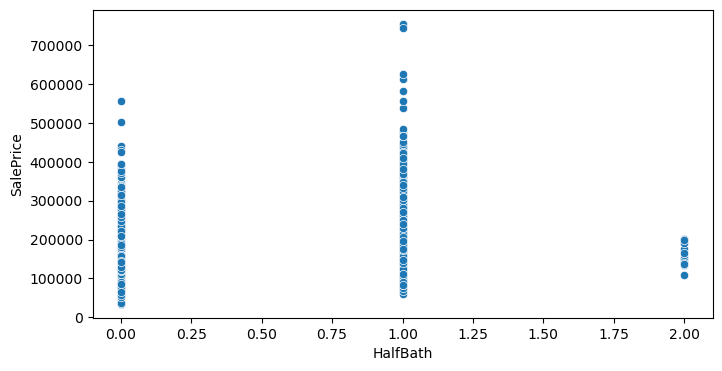

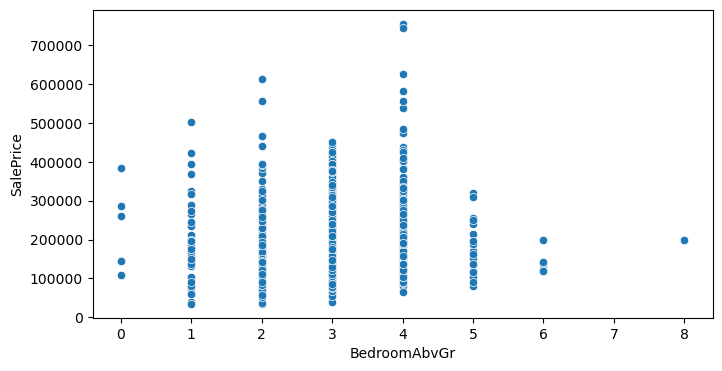

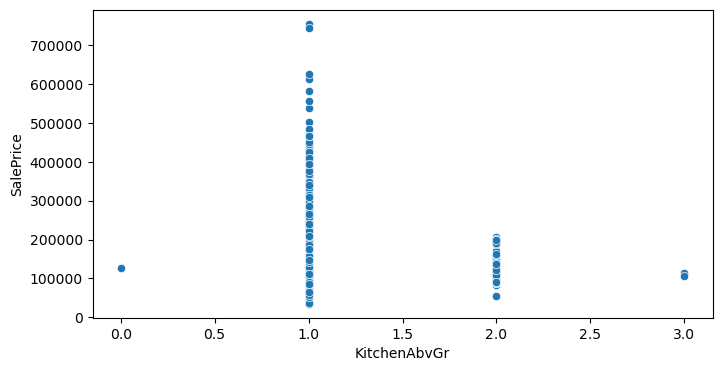

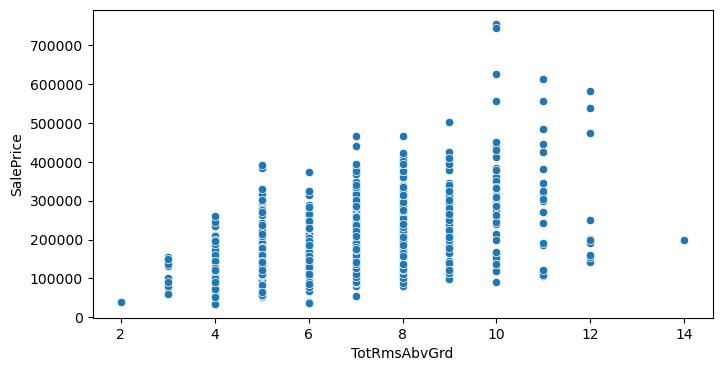

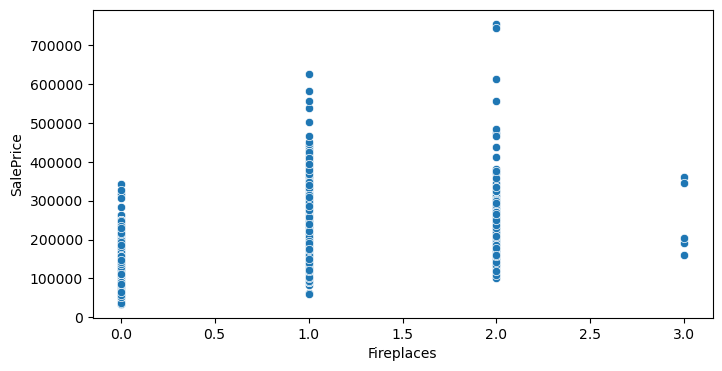

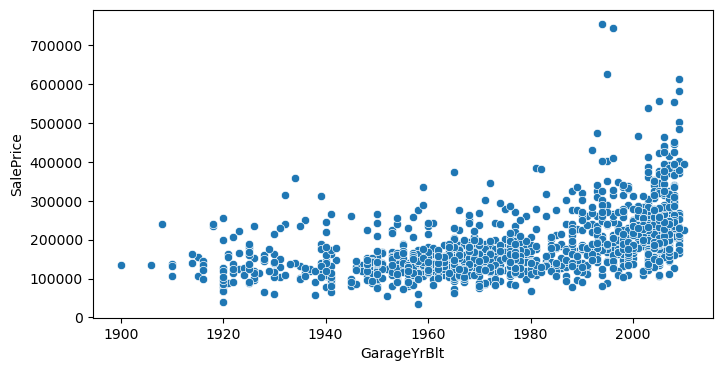

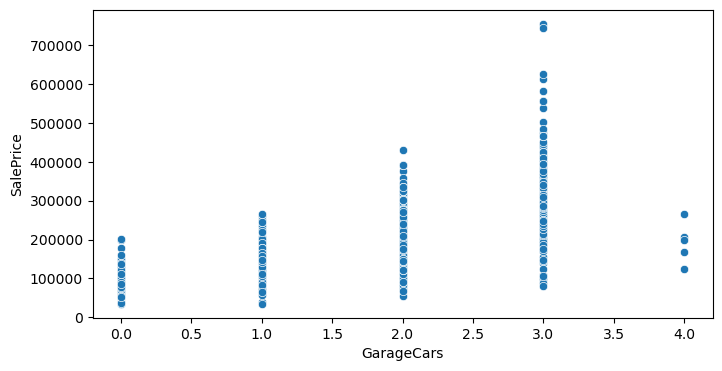

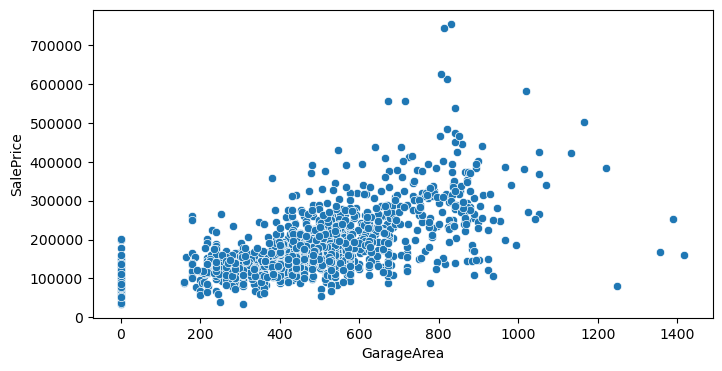

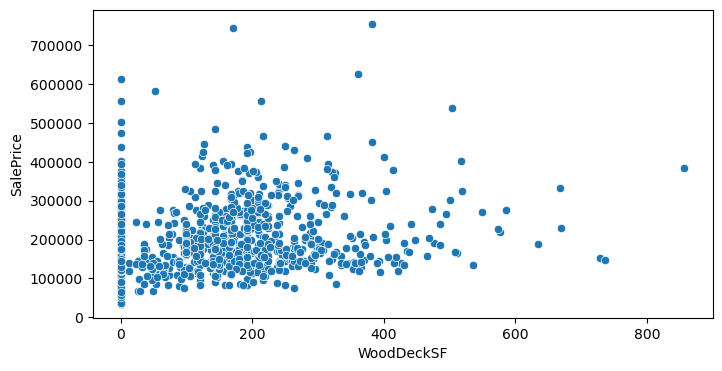

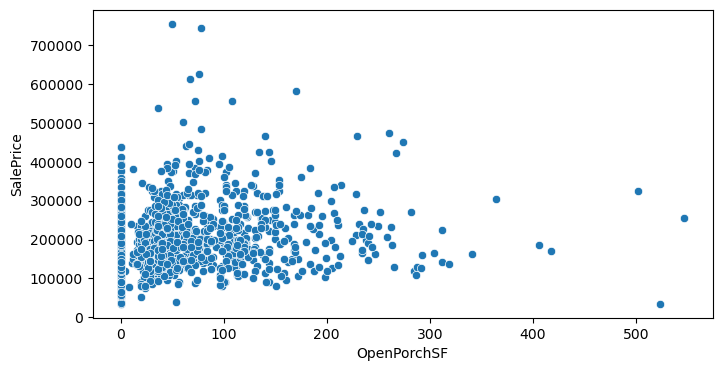

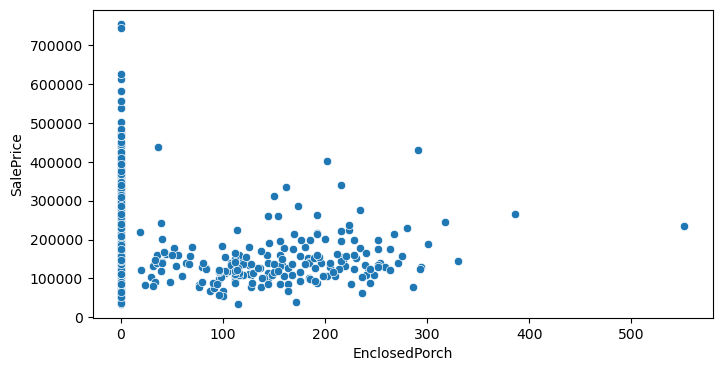

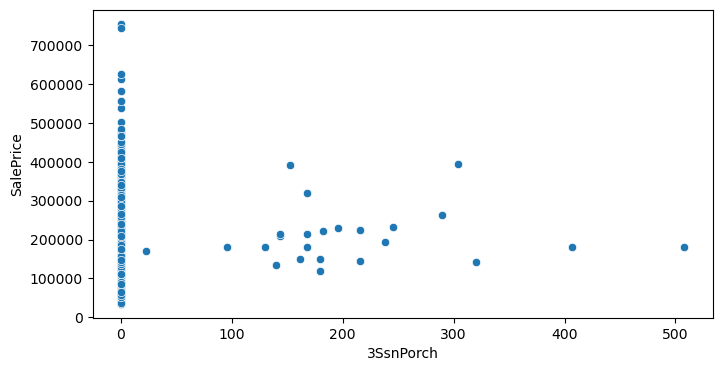

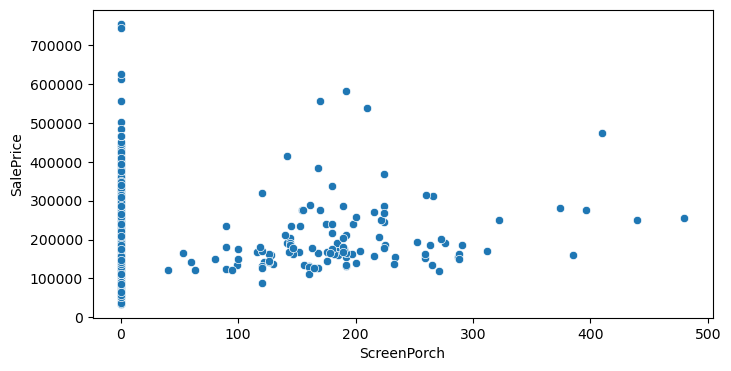

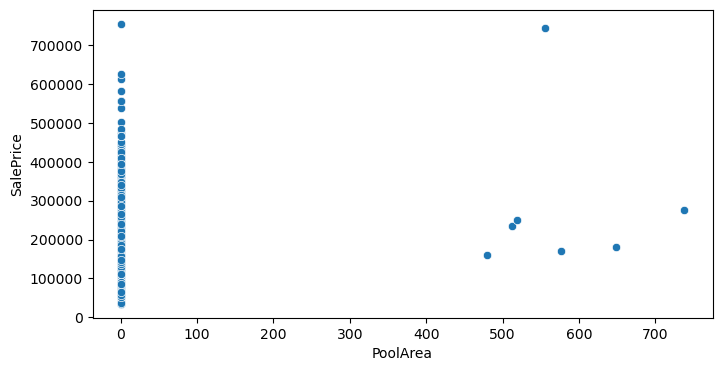

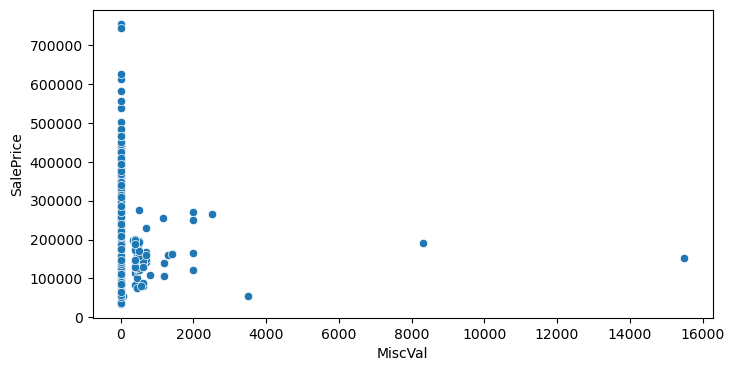

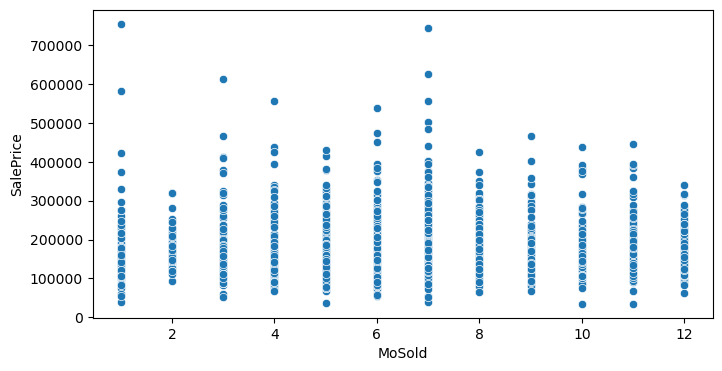

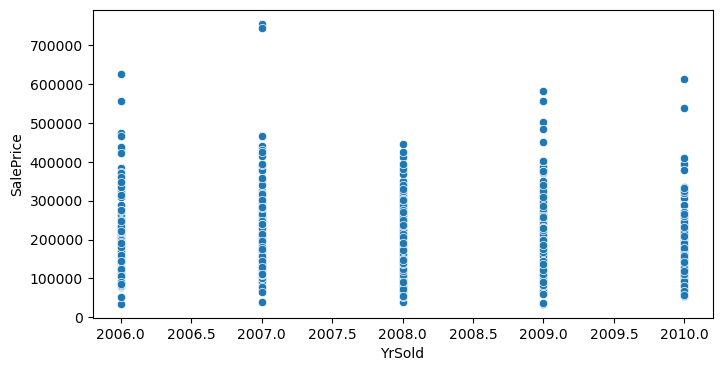

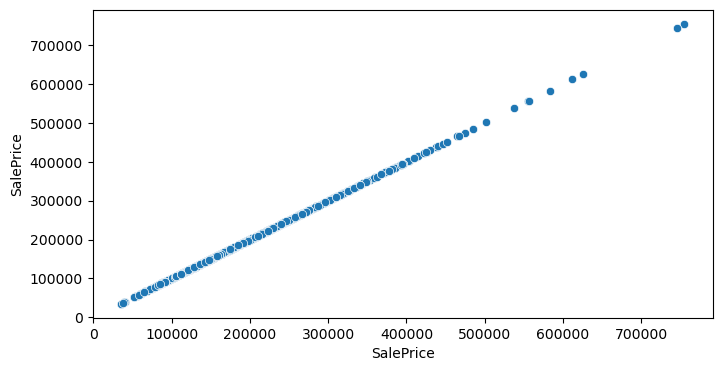

In [22]:
for i in con:
    plt.figure(figsize=(8,4))
    sns.scatterplot(df,x=i,y='SalePrice')
    plt.show()

## 📉 Scatter Plot Observations

### 📈 SalePrice Increases With:
1. **Overall Quality:** Higher quality ratings (e.g., 7–10) are associated with higher sale prices.
2. **Basement Area:** SalePrice increases as **basement area increases**, particularly in the **1,000–2,000 sq ft** range.
3. **Number of Full Bathrooms:** More full bathrooms correlate positively with SalePrice.
4. **Total Rooms Above Ground:** Houses with **2 to 10 rooms** above grade tend to have higher prices.

---

### 💰 High SalePrice Observed:
1. **Overall Condition = 5/10:** Surprisingly, many high-priced houses have an **average condition score (5/10)**.
2. **No Pool Area or Miscellaneous Features:** High SalePrices are often recorded for homes **without pools or additional features (MiscVal = 0)**.
3. **Month of Sale:** Higher prices are observed in **January (1st month)** and **July (7th month)**. Other months show a typical price range of **$100,000 – $400,000**.
4. **Year of Sale:** **2006 and 2007** stand out with higher SalePrices compared to other years, which mostly fall in the **$100,000 – $400,000** range.

---

📬 **Author:** Gaurang Kumbhar  
📧 **Email:** [gaurang.kumbhar1332003@gmail.com](mailto:gaurang.kumbhar1332003@gmail.com)


<Axes: >

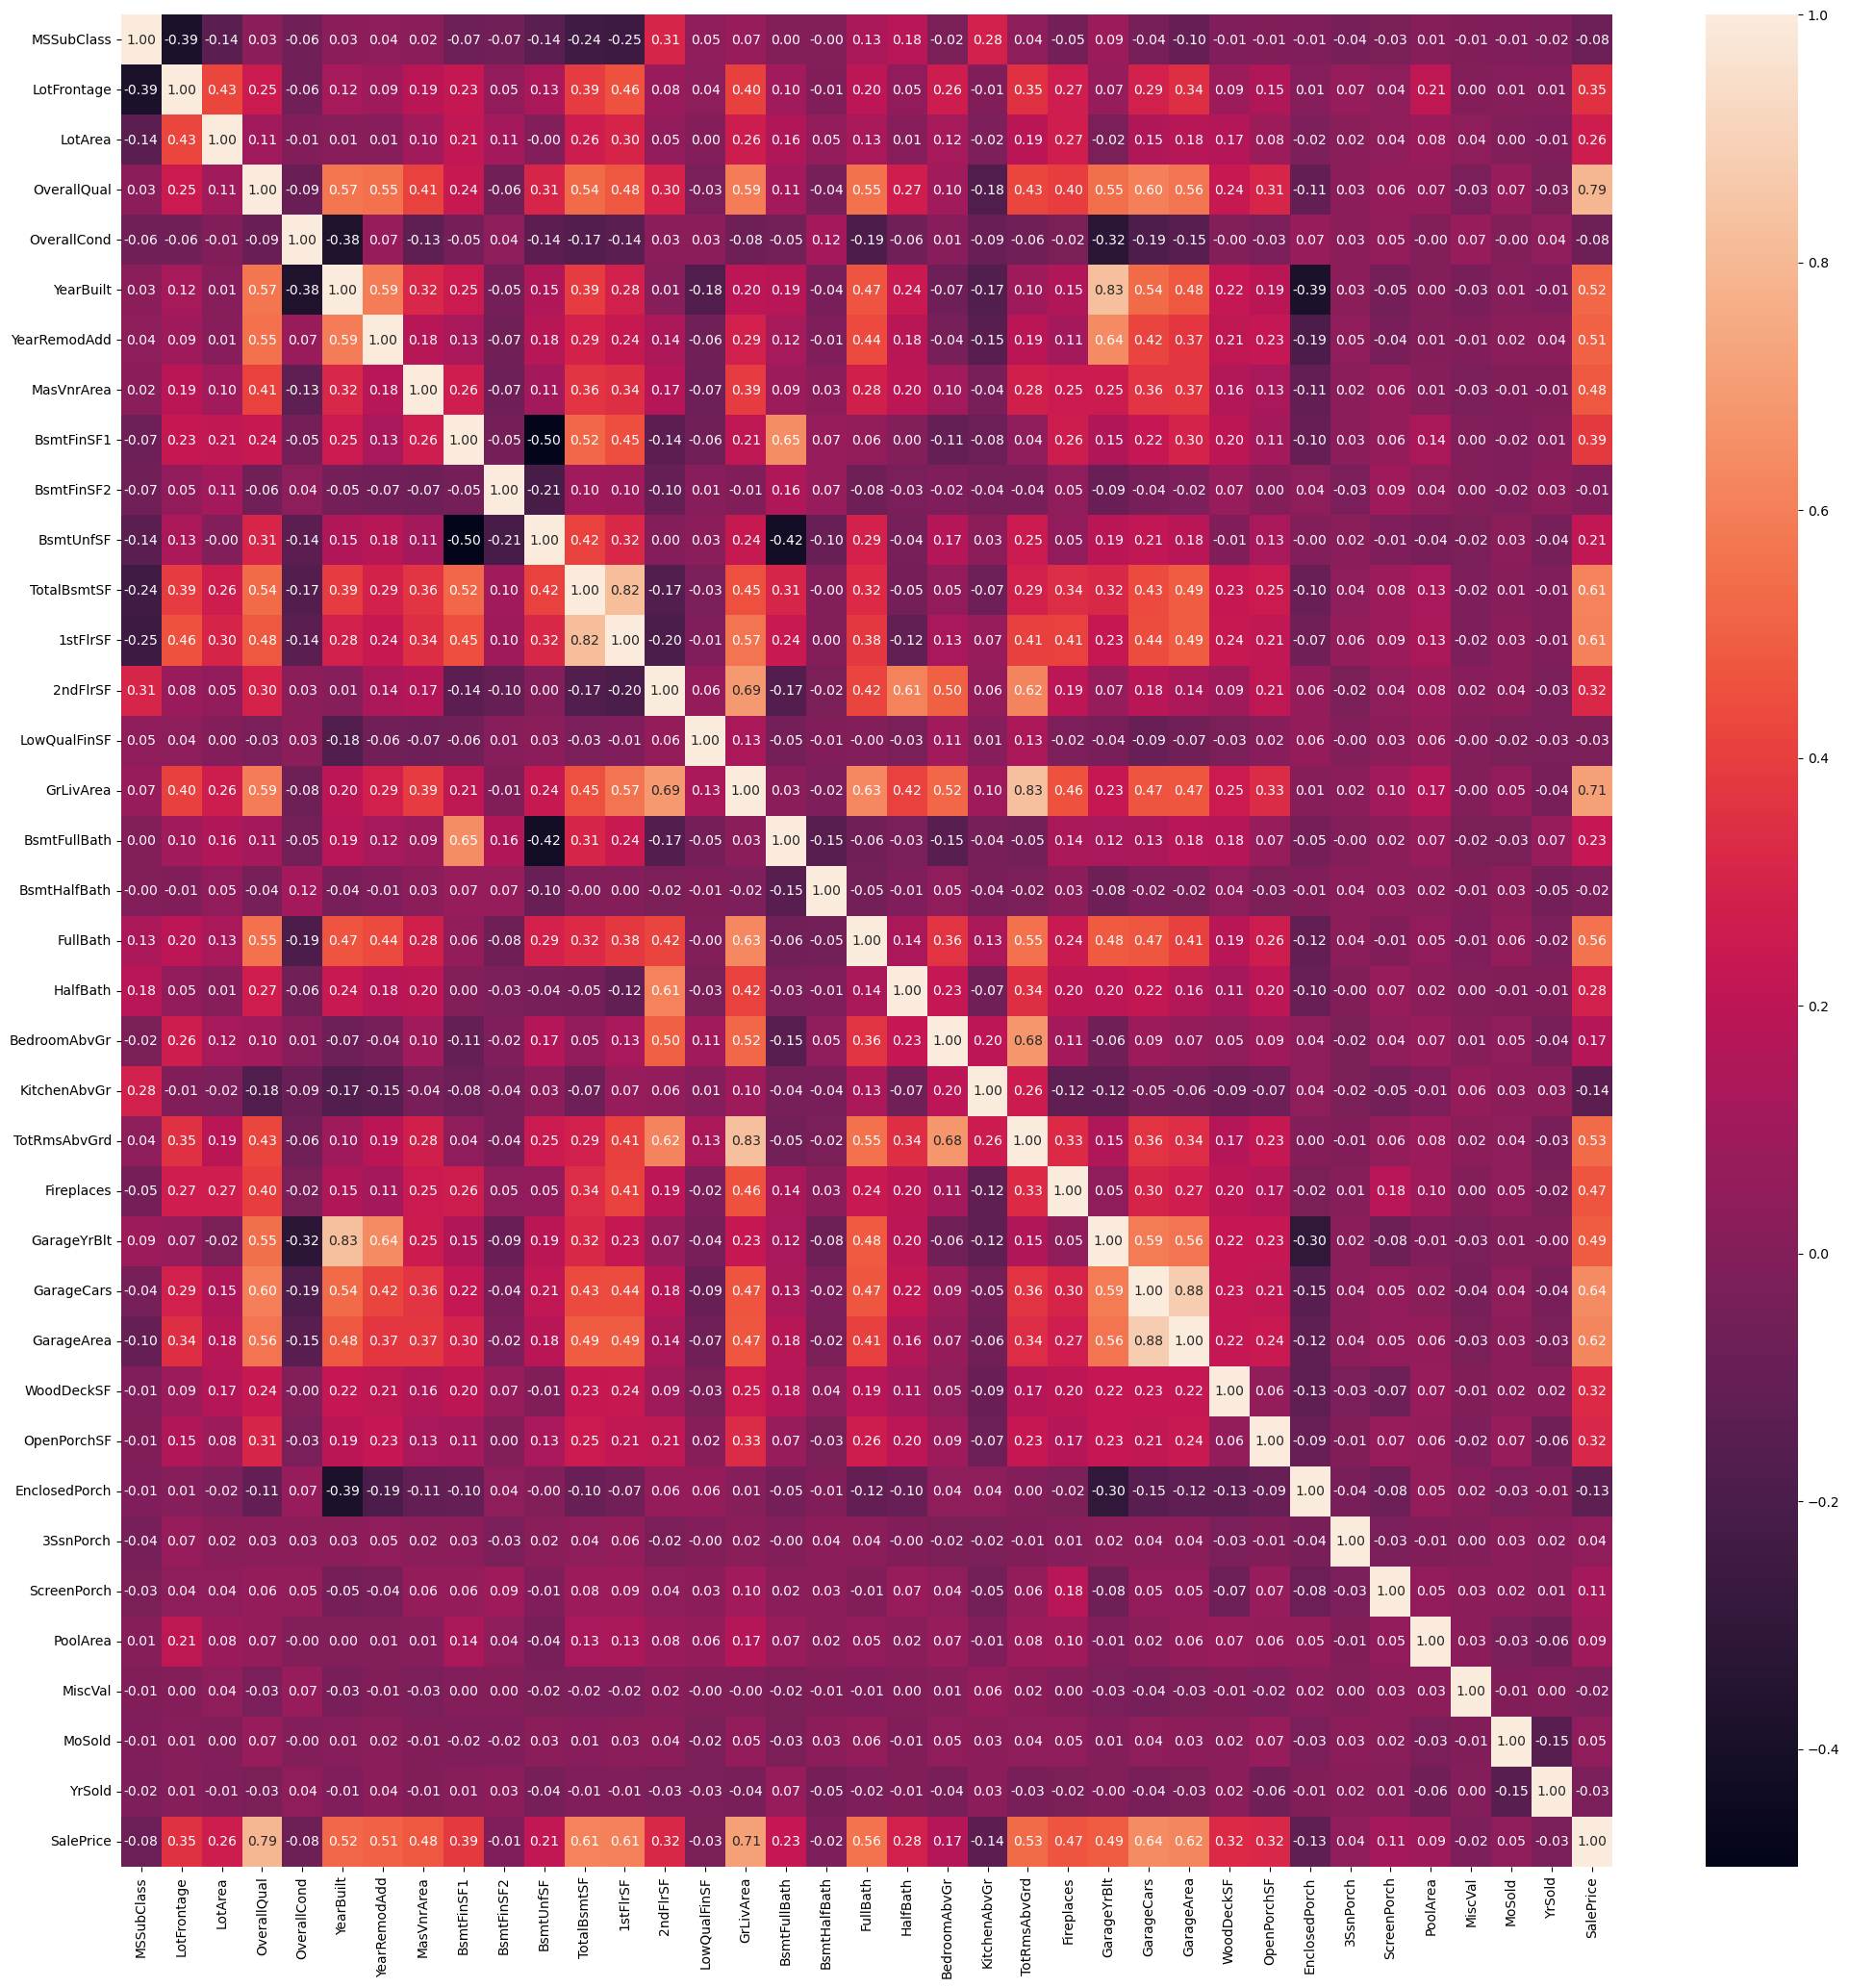

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(df[con].corr(),annot=True,fmt=".2f")

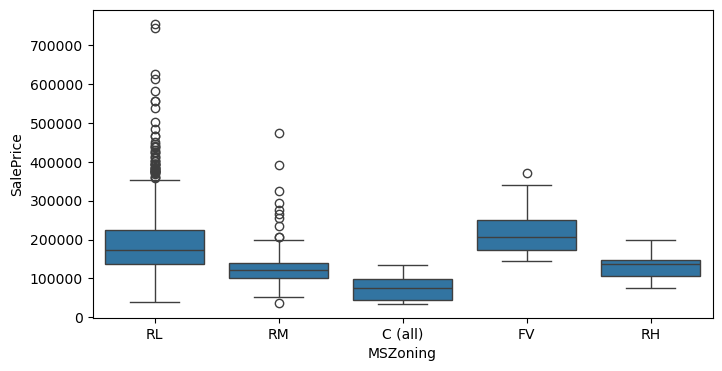

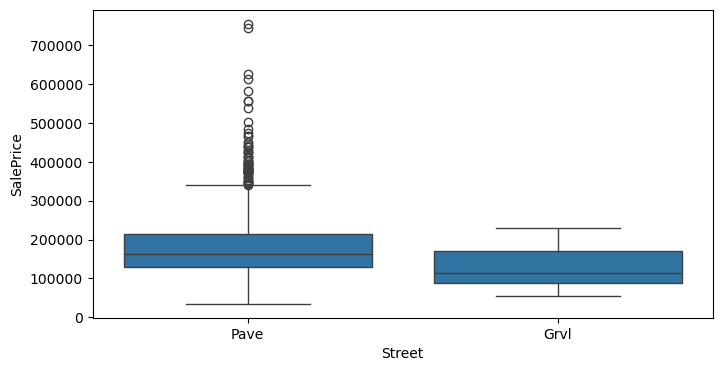

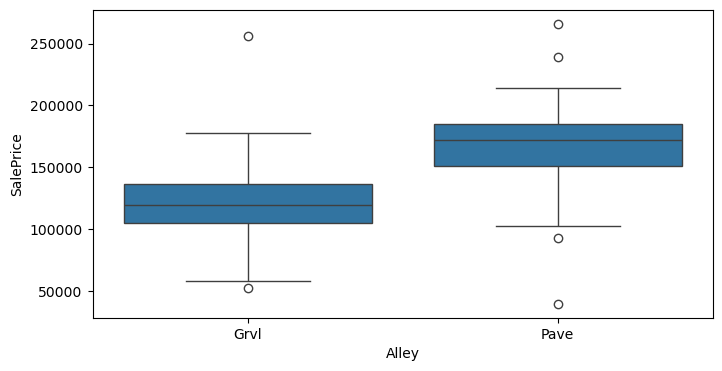

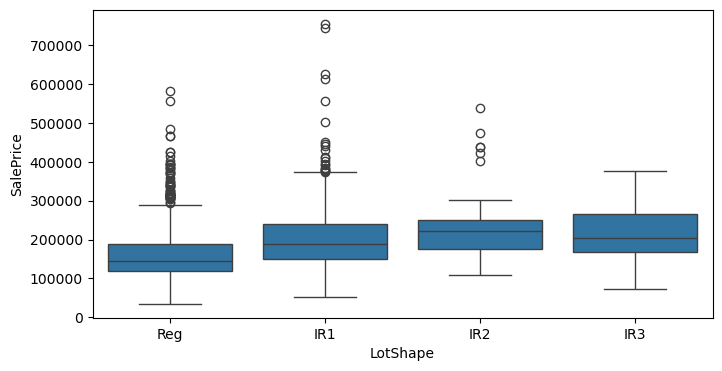

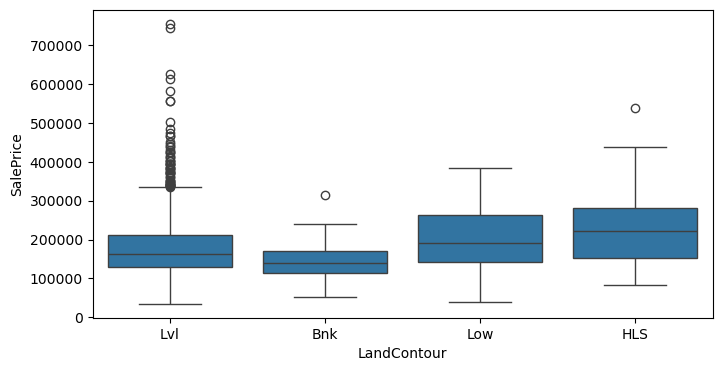

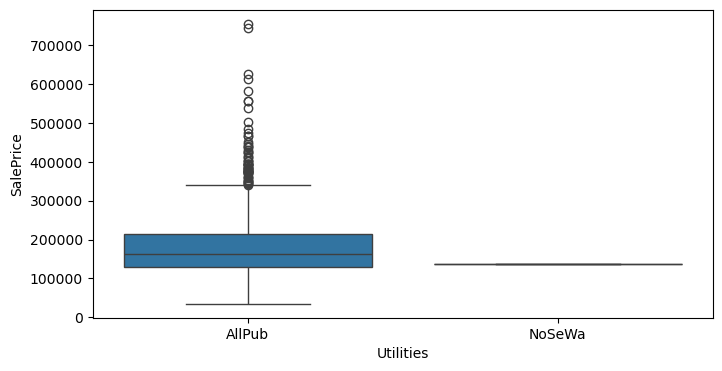

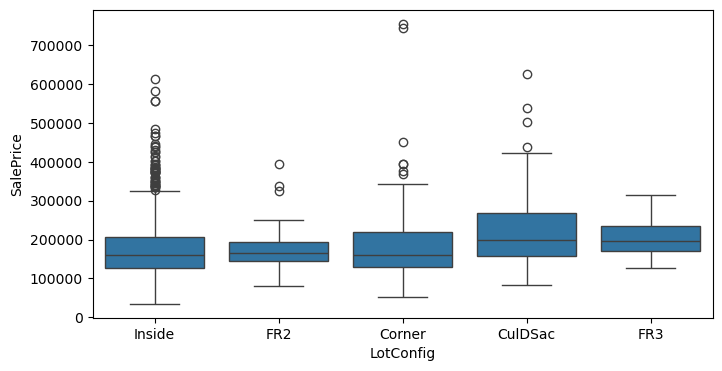

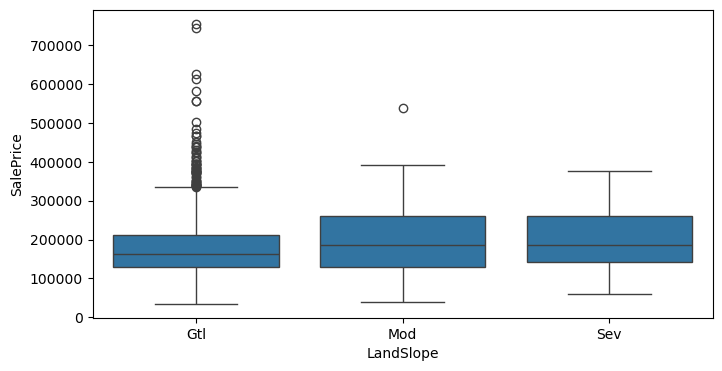

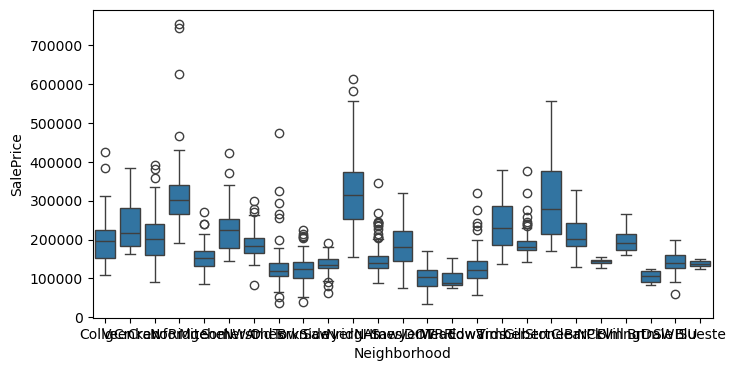

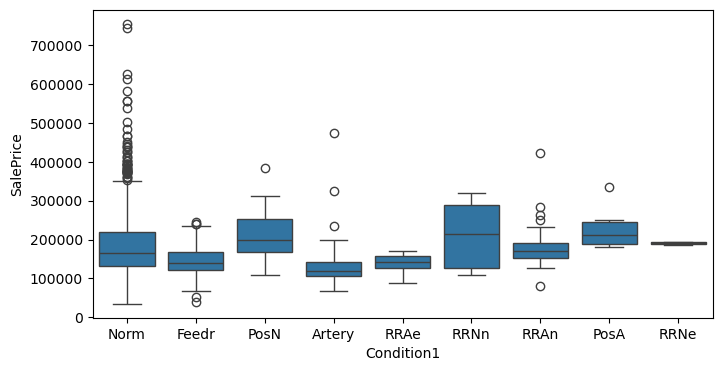

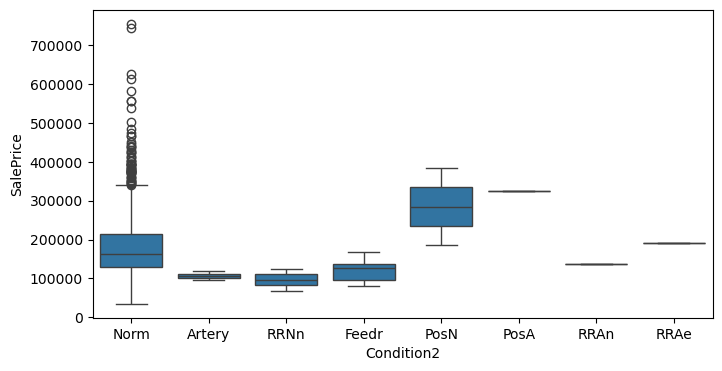

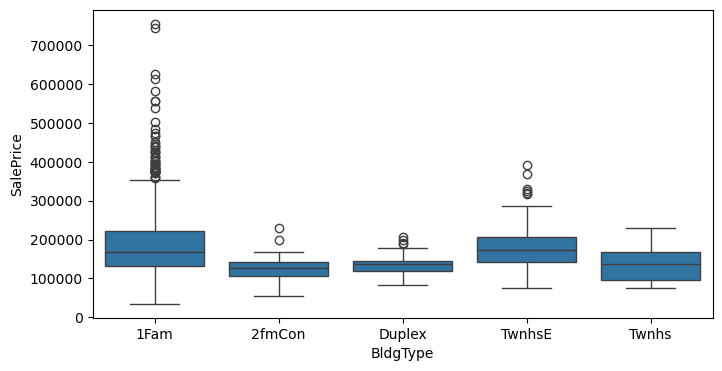

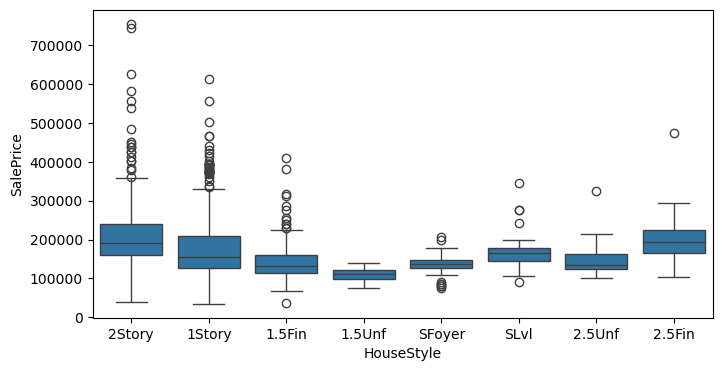

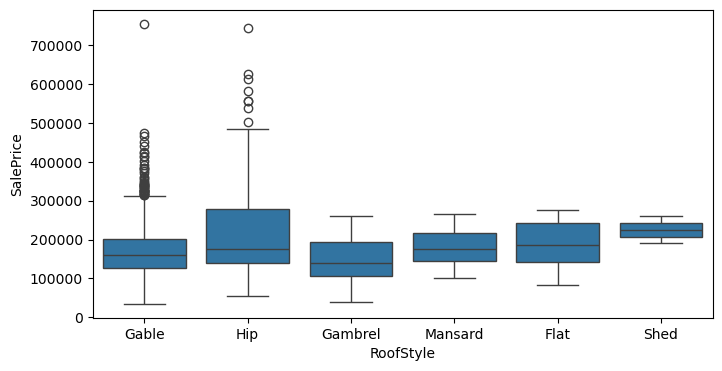

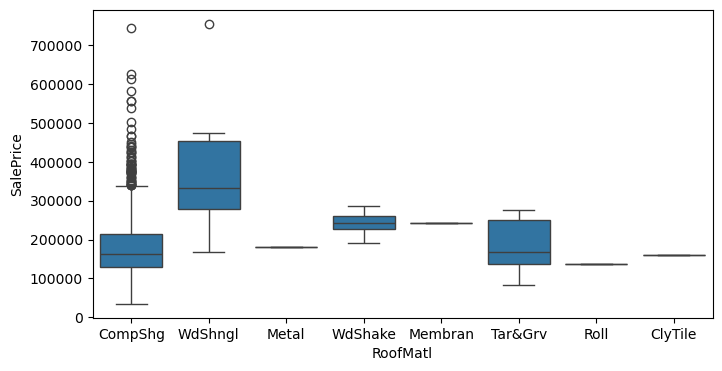

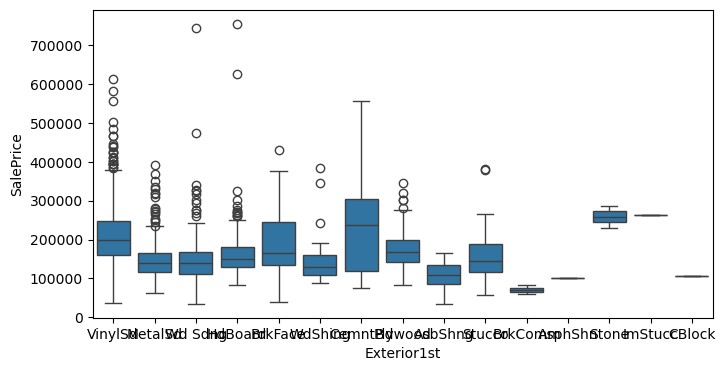

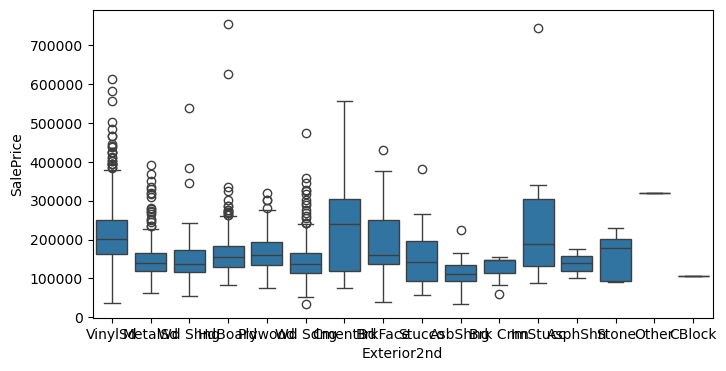

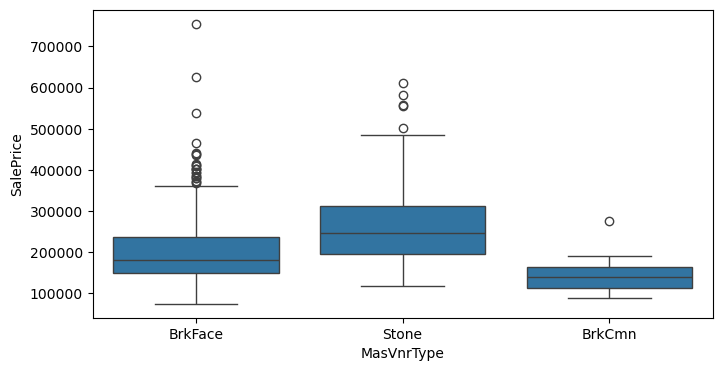

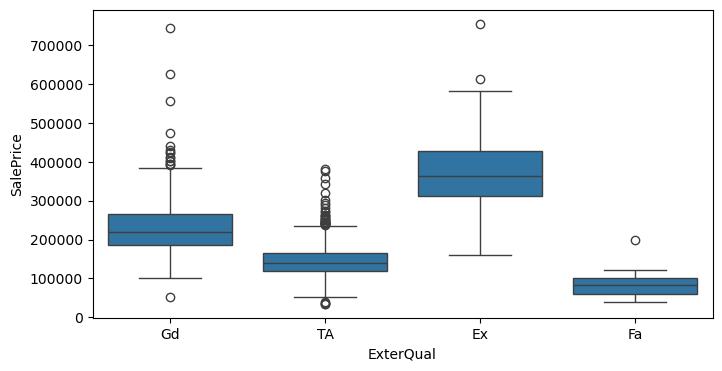

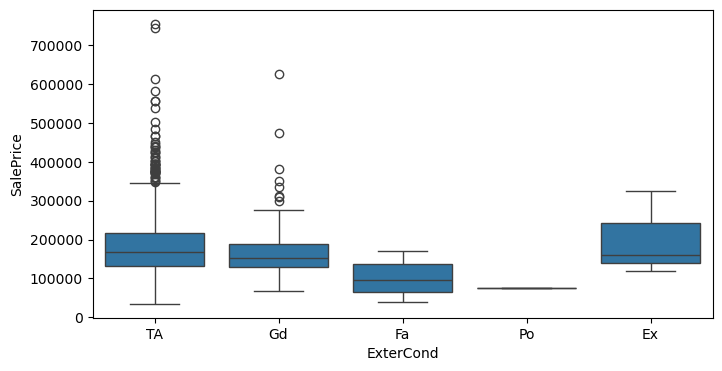

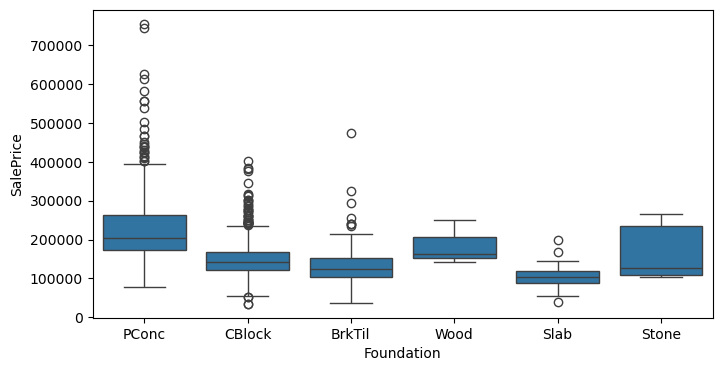

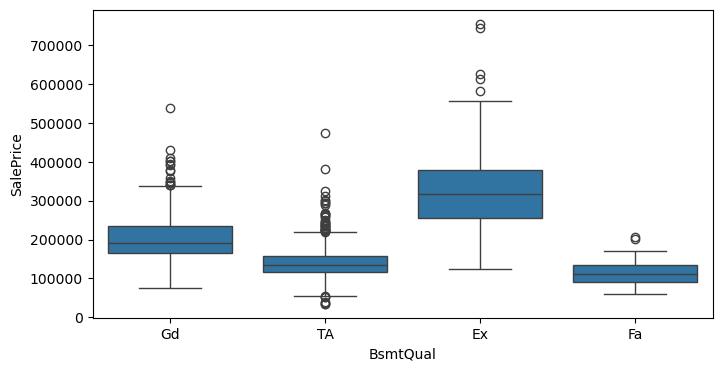

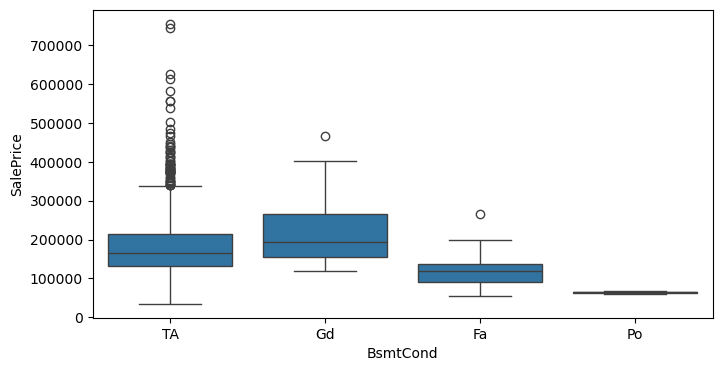

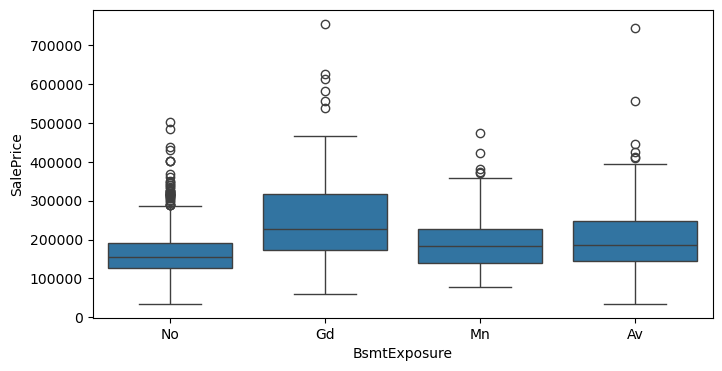

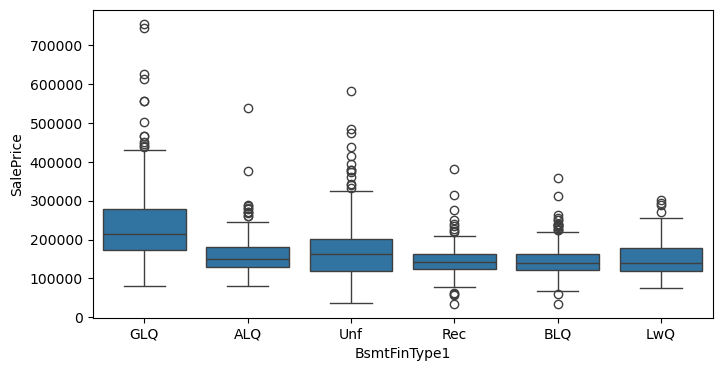

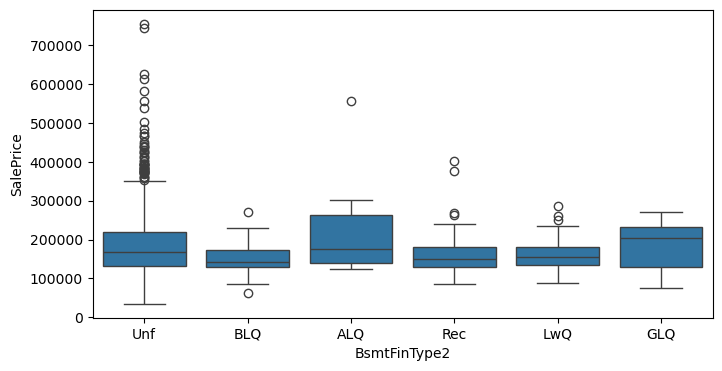

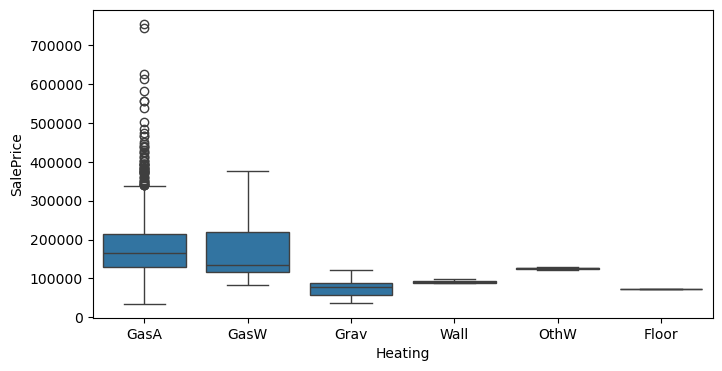

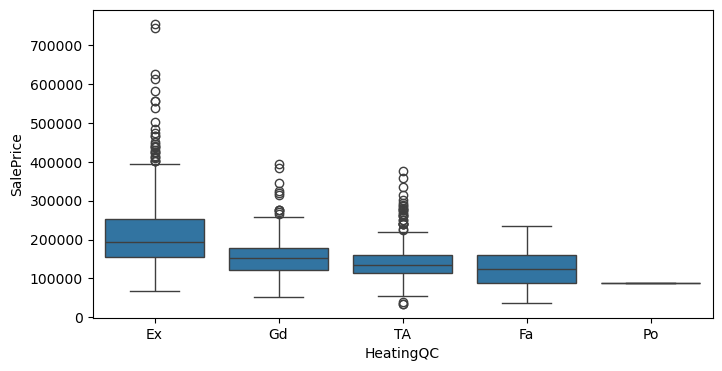

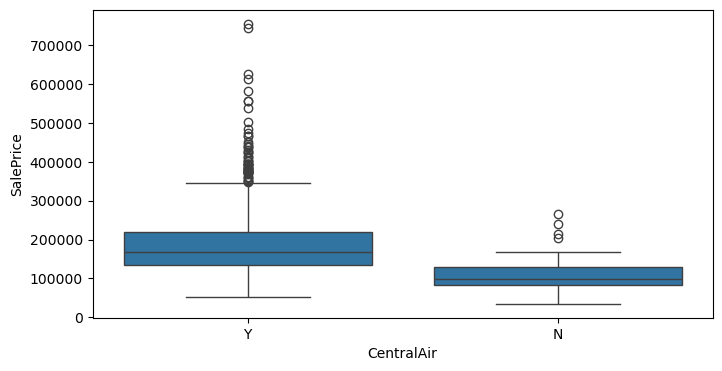

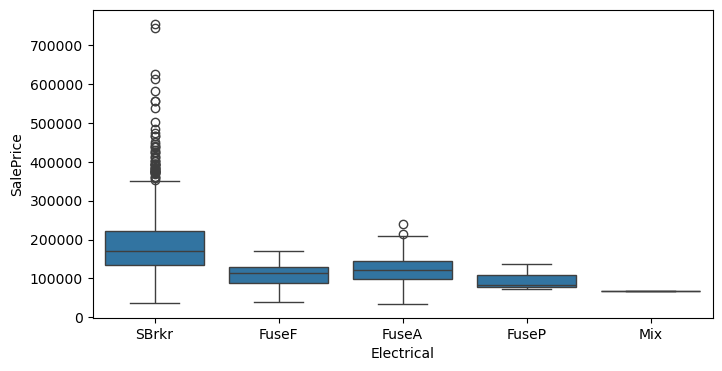

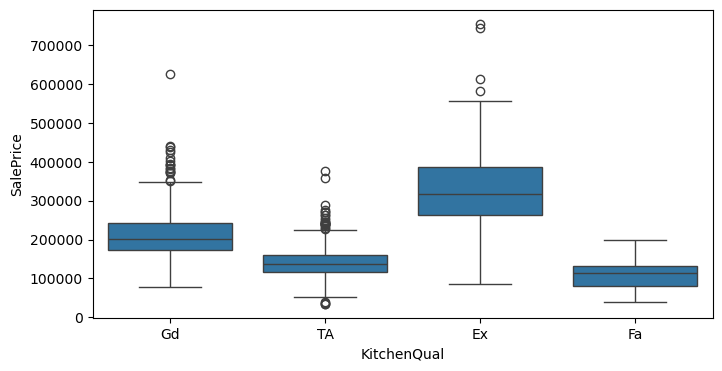

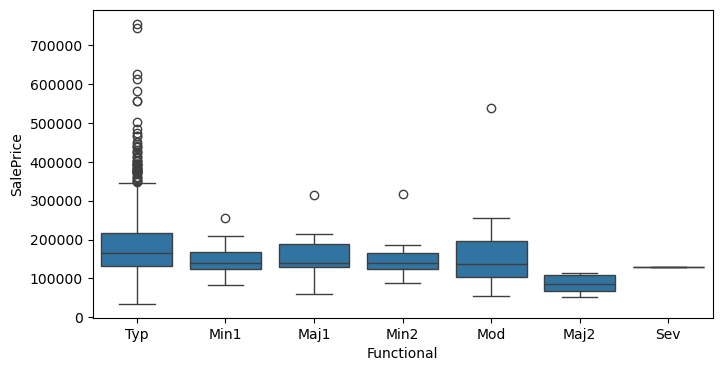

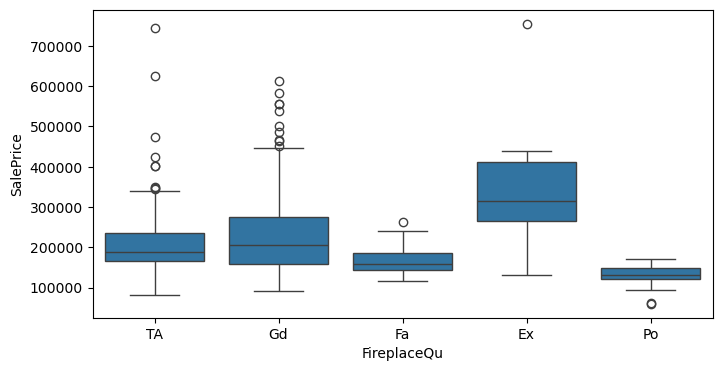

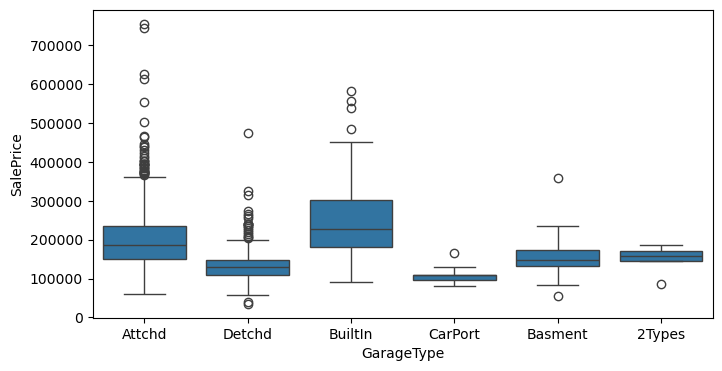

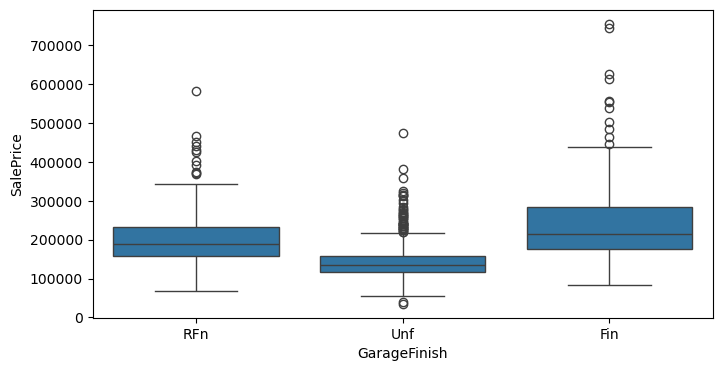

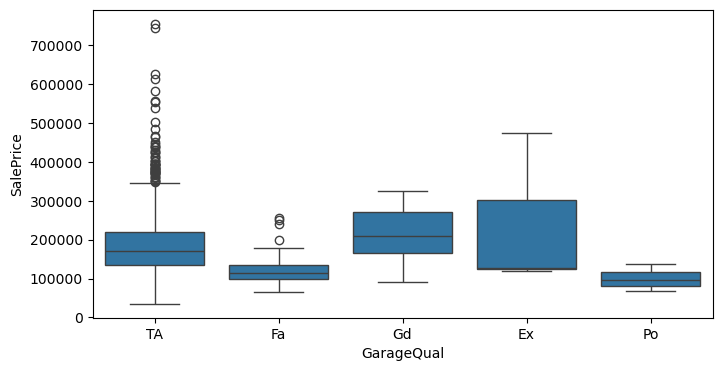

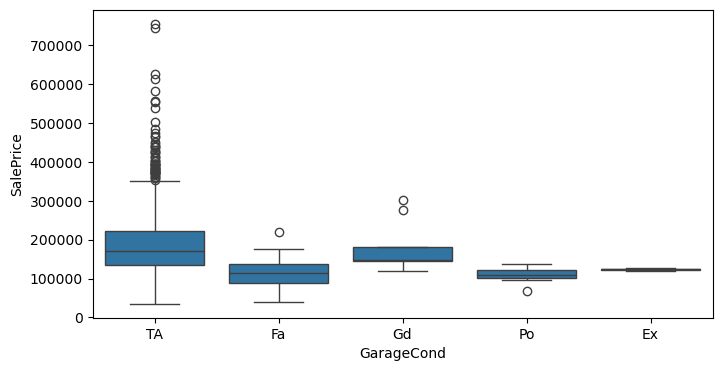

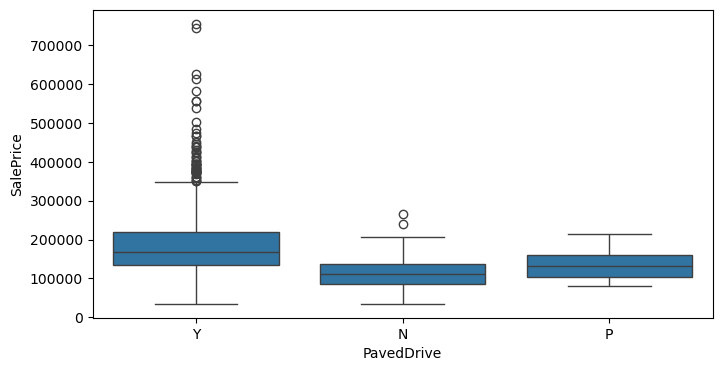

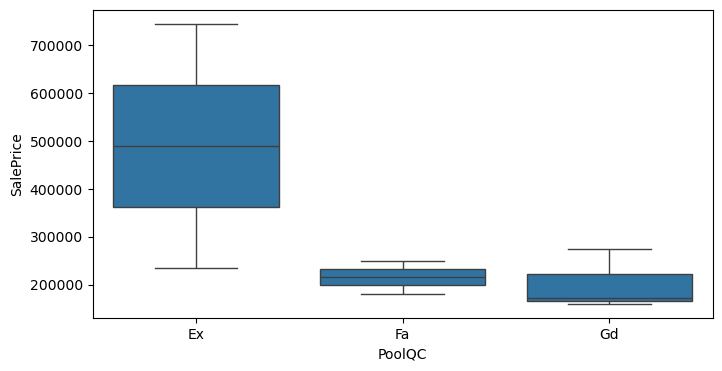

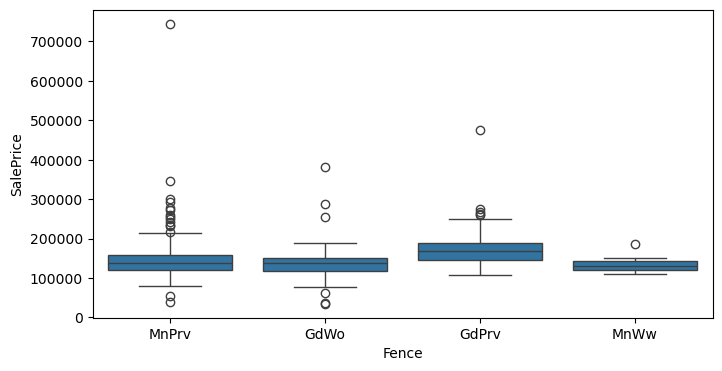

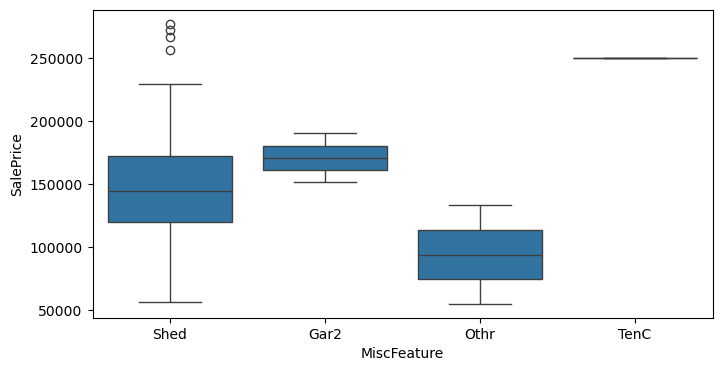

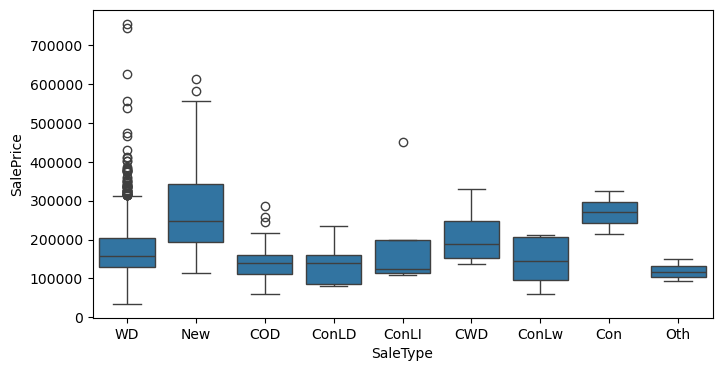

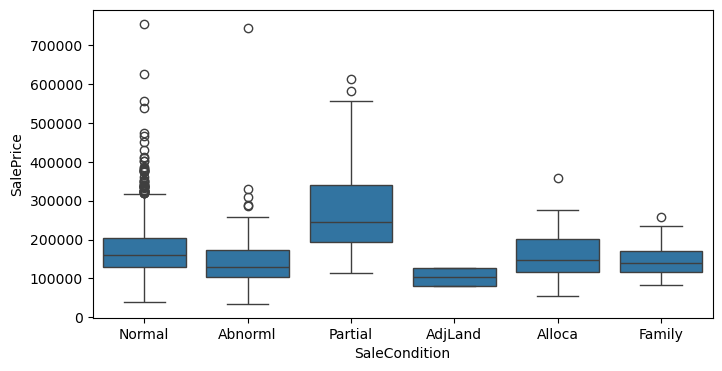

In [24]:
for i in cat:
    plt.figure(figsize=(8,4))
    sns.boxplot(df,x=i,y='SalePrice')

## 📦 Box Plot Observations

1. **Zoning:** The majority of sales occur in the **Residential Low Density (RL)** and **Floating Village Residential (FV)** zones.
2. **Street & Alley Access:**
   - **Paved streets** and **gravel alleys** tend to show **higher SalePrices**, though with **many outliers**.
   - In contrast, **gravel streets** and **paved alleys** are associated with **lower SalePrices** and **fewer outliers**.
3. **Utilities:** Most homes offer **all public utilities** (Electricity, Gas, Water, Sewer).
4. **Street Frontage:** The typical property has **50–100 linear feet** of street connection; a small number range from **100–300 feet**.
5. **Quality & Condition:**
   - **Overall Quality** is generally rated **Excellent**.
   - **Overall Condition** tends to be **Typical/Average**.
6. **Year Built:** Most homes were constructed **around 2000**, with another concentration from **1950–1980**.
7. **Year Remodeled:** Remodels are most commonly seen in **1950** and from **2000–2010**.
8. **Basement Area:**
   - **Unfinished basement area:** Typically ranges from **0–1,000 sq ft**.
   - **Total basement area:** Generally between **800–1,200 sq ft**.
9. **Above Ground Living Area:** Most homes have **1,000–2,000 sq ft** of above-ground living space.
10. **Bathrooms:** The majority of homes offer **at least one half or full bathroom**, with some having more.


<Axes: xlabel='SaleCondition', ylabel='SaleType'>

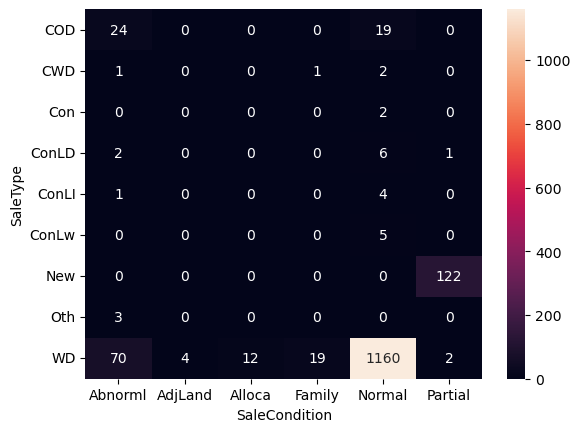

In [25]:
ctab = pd.crosstab(df['SaleType'],df['SaleCondition'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='Street', ylabel='Alley'>

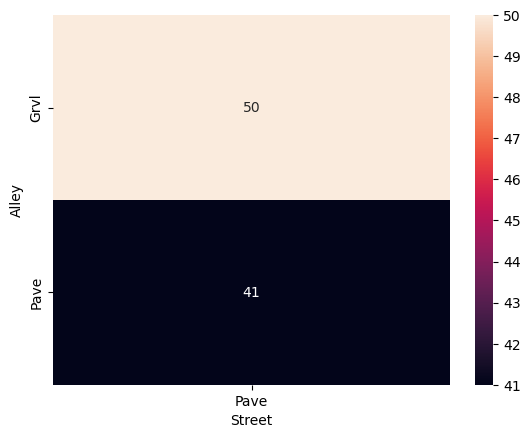

In [26]:
ctab = pd.crosstab(df['Alley'],df['Street'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='SaleCondition', ylabel='Street'>

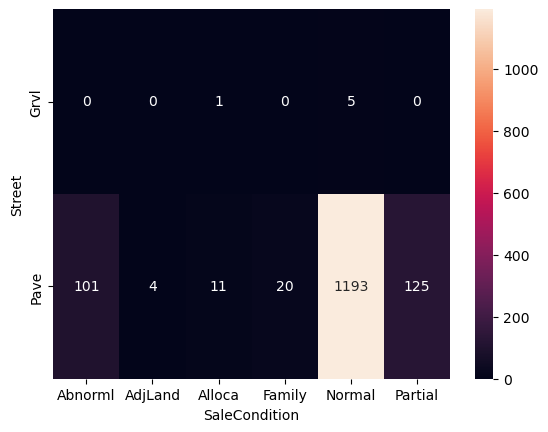

In [27]:
ctab = pd.crosstab(df['Street'],df['SaleCondition'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

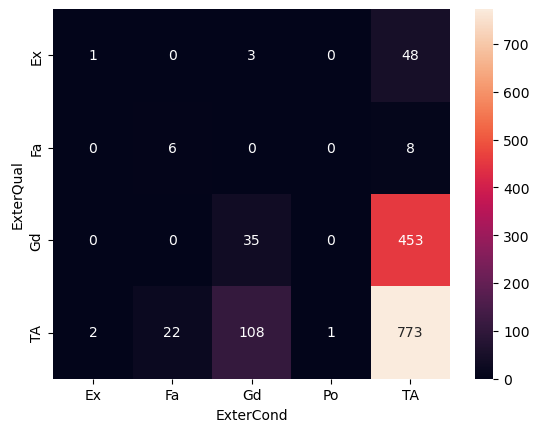

In [28]:
ctab = pd.crosstab(df['ExterQual'],df['ExterCond'])
sns.heatmap(ctab,annot=True,fmt = 'd')

<Axes: xlabel='SaleCondition', ylabel='HouseStyle'>

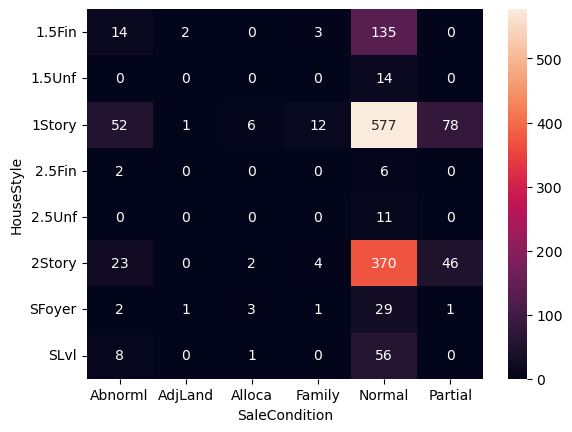

In [29]:
ctab = pd.crosstab(df['HouseStyle'],df['SaleCondition'])
sns.heatmap(ctab,annot=True,fmt = 'd')

## 🧾 Cross Tab Observations

Based on the crosstab analysis, most house properties exhibit the following combinations:

1. **Alley & Street Access:**  
   - Majority have **gravel alley access** combined with **paved street access**.

2. **Sale Type & Condition:**  
   - Most sales occur under **Warranty Deed – Conventional** with a **Normal** sale condition.

3. **Exterior Quality & Condition:**  
   - Both **Exterior Quality** and **Exterior Condition** are typically rated as **Typical/Average**.

4. **House Style & Sale Condition:**  
   - The most common house style is **1-Story**, and these are often sold under **Normal** conditions.



# 🏁 Conclusions

## 🏡 Characteristics of Highly Sold House Properties:

1. Located in **'RL' – Residential Low Density** zones.
2. Feature **gravel alley access** and **paved street access**.
3. Typically have a **1-story style**, sold via **Warranty Deed – Conventional**, and under **Normal** sale conditions.
4. Exhibit **Typical/Average** ratings for:
   - **Exterior Quality & Condition**
   - **Kitchen Quality & Condition**
5. Possess an **Excellent Overall Quality** and **Typical/Average Overall Condition**.
6. Include **full or half bathrooms**, with **larger basement areas**.
7. Built on **PConc** or **CBlock** foundations and use **gas-forced warm air furnace** heating.
8. Equipped with **Central AC** and **Standard Circuit Breakers & Romex** electrical systems.
9. Typically **do not include pools, fences, or miscellaneous features**.
10. Have **9–12 total rooms** above ground level.

---

## 📈 SalePrice Trends:

- Sale prices are **highest during the 1st, 3rd, and 7th months** of the year (i.e., **January, March, and July**).
- Notably **high SalePrices** were also observed during the **early to mid-2000s**, particularly in **2006 and 2007**.

---

📬 **Author:** Gaurang Kumbhar  
📧 **Contact:** [gaurang.kumbhar1332003@gmail.com](mailto:gaurang.kumbhar1332003@gmail.com)
